# Customer Life Time Value Predition

### Data Set Information

The data is collected from IBM Watson Analytics. 
The lifetime value of a customer, or customer lifetime value (CLV), represents the total amount of money a customer is expected to spend in business, or on products, during their lifetime. 
This is an important figure to know because it helps company to make decisions about how much money to invest in acquiring new customers and retaining existing ones.

**Ojbcective:  The objective of this project is to predict Customer Life Time Value**

### Following Libraries are used for this project:

In [342]:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import mglearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

### Reading the data from CSV

In [343]:
df = pd.read_csv("CLV_Data.csv")

In [344]:
df.head()

Customer       State  Customer Lifetime Value Response  Coverage  \
0  AA10041  California              7901.744238       No     Basic   
1  AA11235      Nevada              2568.843396       No     Basic   
2  AA16582  Washington             24127.504020      Yes     Basic   
3  AA30683  California              6595.101921       No   Premium   
4  AA34092  California             28799.954150       No  Extended   

              Education Effective To Date EmploymentStatus Gender   Income  \
0  High School or Below          02/02/11       Unemployed      M      0.0   
1              Bachelor           1/28/11    Medical Leave      F  11167.0   
2              Bachelor           1/26/11    Medical Leave      M  14072.0   
3              Bachelor           1/15/11       Unemployed      M      0.0   
4               College          02/11/11         Employed      M  33635.0   

   ... Months Since Policy Inception Number of Open Complaints  \
0  ...                          83.0                       0.0   
1  ...                          99.0                       3.0   
2  ...                           3.0                       0.0   
3  ...                          38.0                       2.0   
4  ...                          23.0                       0.0   

   Number of Policies    Policy Type       Policy  Renew Offer Type  \
0                 5.0  Personal Auto  Personal L3            Offer1   
1                 1.0  Personal Auto  Personal L3            Offer2   
2                 2.0  Personal Auto  Personal L2            Offer1   
3                 7.0  Personal Auto  Personal L3            Offer1   
4                 2.0  Personal Auto  Personal L3            Offer1   

   Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0    Call Center        1258.327804            SUV      Medsize  
1         Branch         350.400000   Two-Door Car      Medsize  
2          Agent         511.200000  Four-Door Car      Medsize  
3            Web         847.717402  Four-Door Car      Medsize  
4            Web        1152.000000     Luxury SUV      Medsize  

[5 rows x 24 columns]

In [345]:
df.tail()

Customer       State  Customer Lifetime Value Response  Coverage  \
9129  ZZ77357      Nevada              4468.220900       No     Basic   
9130  ZZ83340      Oregon              5508.315536       No     Basic   
9131  ZZ89380      Oregon              3196.578455       No  Extended   
9132  ZZ91716  California              3256.766388       No  Extended   
9133  ZZ97035  California             20714.940430       No  Extended   

                 Education Effective To Date EmploymentStatus Gender   Income  \
9129  High School or Below          01/09/11       Unemployed      M      0.0   
9130                Doctor          02/04/11         Employed      F  96021.0   
9131              Bachelor          01/10/11         Employed      F  62815.0   
9132              Bachelor           1/22/11       Unemployed      F      0.0   
9133               College          02/01/11       Unemployed      M      0.0   

      ... Months Since Policy Inception Number of Open Complaints  \
9129  ...                          61.0                       0.0   
9130  ...                          30.0                       0.0   
9131  ...                          84.0                       0.0   
9132  ...                          56.0                       0.0   
9133  ...                          66.0                       0.0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
9129                 9.0  Corporate Auto  Corporate L2            Offer1   
9130                 5.0   Personal Auto   Personal L1            Offer3   
9131                 1.0    Special Auto    Special L1            Offer2   
9132                 1.0   Personal Auto   Personal L3            Offer2   
9133                 2.0  Corporate Auto  Corporate L1            Offer1   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
9129          Agent         468.000000   Two-Door Car      Medsize  
9130         Branch         315.004602   Two-Door Car      Medsize  
9131    Call Center          47.061469   Two-Door Car        Large  
9132            Web         491.755368  Four-Door Car        Small  
9133         Branch        2027.724442     Luxury Car        Small  

[5 rows x 24 columns]

## Exploring the dataset

### Calculating number of rows and columns

In [346]:
print("Total Number of Columns: ", df.shape[1])
print("Total Number of Rows: ", df.shape[0])

Total Number of Columns:  24
Total Number of Rows:  9134


### Calculating total number null values

In [347]:
print("Total number of Null Values: ", df.isnull().sum().sum())

Total number of Null Values:  925


### Data Types of each column

In [348]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location Code                     object
Marital Status                    object
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints        float64
Number of Policies               float64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

### Basic information of data frame

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9087 non-null   object 
 4   Coverage                       9078 non-null   object 
 5   Education                      9048 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9052 non-null   object 
 8   Gender                         9062 non-null   object 
 9   Income                         9081 non-null   float64
 10  Location Code                  9033 non-null   object 
 11  Marital Status                 9062 non-null   object 
 12  Monthly Premium Auto           9081 non-null   f

### Various descriptive statistics on the DataFrame

In [350]:
df.describe()

Customer Lifetime Value        Income  Monthly Premium Auto  \
count              9134.000000   9081.000000           9081.000000   
mean               8004.940475  37631.804317             93.218478   
std                6870.967608  30386.530349             34.423683   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33881.000000             83.000000   
75%                8962.167041  62271.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       Months Since Last Claim  Months Since Policy Inception  \
count              9081.000000                    9083.000000   
mean                 15.102962                      48.052406   
std                  10.075916                      27.880251   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       Number of Open Complaints  Number of Policies  Total Claim Amount  
count                9087.000000         9107.000000         9134.000000  
mean                    0.385386            2.966509          434.088794  
std                     0.912190            2.390698          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

### Correlation Matrix

In [351]:
cor_mat = df.corr() 
cor_mat

Customer Lifetime Value    Income  \
Customer Lifetime Value                       1.000000  0.025197   
Income                                        0.025197  1.000000   
Monthly Premium Auto                          0.396750 -0.016457   
Months Since Last Claim                       0.011341 -0.025196   
Months Since Policy Inception                 0.009627 -0.000988   
Number of Open Complaints                    -0.036822  0.007091   
Number of Policies                            0.022065 -0.009461   
Total Claim Amount                            0.226451 -0.355679   

                               Monthly Premium Auto  Months Since Last Claim  \
Customer Lifetime Value                    0.396750                 0.011341   
Income                                    -0.016457                -0.025196   
Monthly Premium Auto                       1.000000                 0.005255   
Months Since Last Claim                    0.005255                 1.000000   
Months Since Policy Inception              0.022409                -0.041670   
Number of Open Complaints                 -0.012493                 0.004814   
Number of Policies                        -0.012119                 0.009374   
Total Claim Amount                         0.631944                 0.006805   

                               Months Since Policy Inception  \
Customer Lifetime Value                             0.009627   
Income                                             -0.000988   
Monthly Premium Auto                                0.022409   
Months Since Last Claim                            -0.041670   
Months Since Policy Inception                       1.000000   
Number of Open Complaints                          -0.000736   
Number of Policies                                 -0.012581   
Total Claim Amount                                  0.004275   

                               Number of Open Complaints  Number of Policies  \
Customer Lifetime Value                        -0.036822            0.022065   
Income                                          0.007091           -0.009461   
Monthly Premium Auto                           -0.012493           -0.012119   
Months Since Last Claim                         0.004814            0.009374   
Months Since Policy Inception                  -0.000736           -0.012581   
Number of Open Complaints                       1.000000            0.001953   
Number of Policies                              0.001953            1.000000   
Total Claim Amount                             -0.014549           -0.002169   

                               Total Claim Amount  
Customer Lifetime Value                  0.226451  
Income                                  -0.355679  
Monthly Premium Auto                     0.631944  
Months Since Last Claim                  0.006805  
Months Since Policy Inception            0.004275  
Number of Open Complaints               -0.014549  
Number of Policies                      -0.002169  
Total Claim Amount                       1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

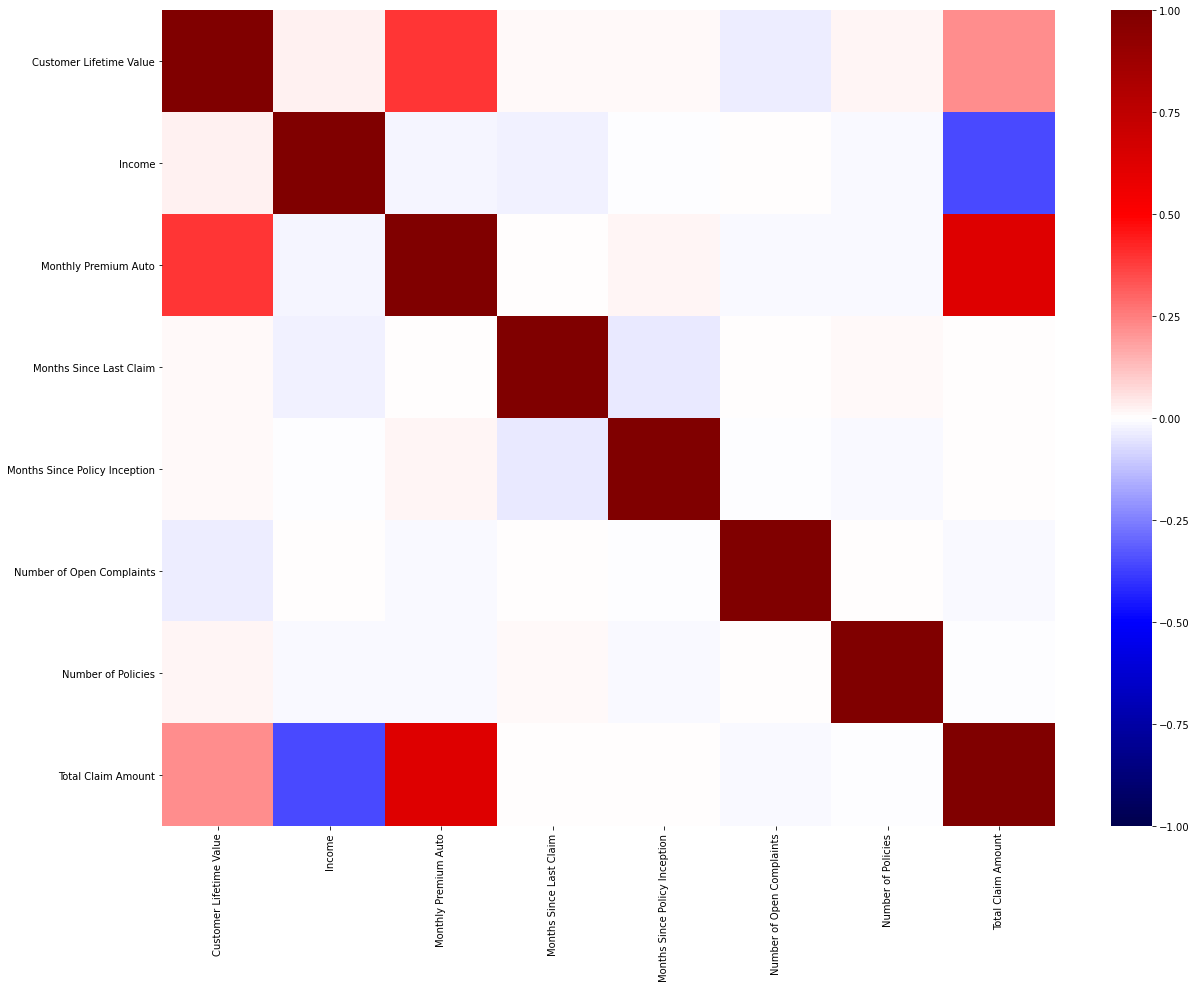

In [352]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(cor_mat, vmin = -1, vmax = 1, cmap= "seismic")
plt.gca().patch.set(hatch = "df", edgecolor = "#555")
plt.show

From the correlation matrix we can infer that Monthly Premium Auto and Total Claim Amount are highly correlated with the target variable Customer Lifetime Value.

### Box Plots of Numerical Variables

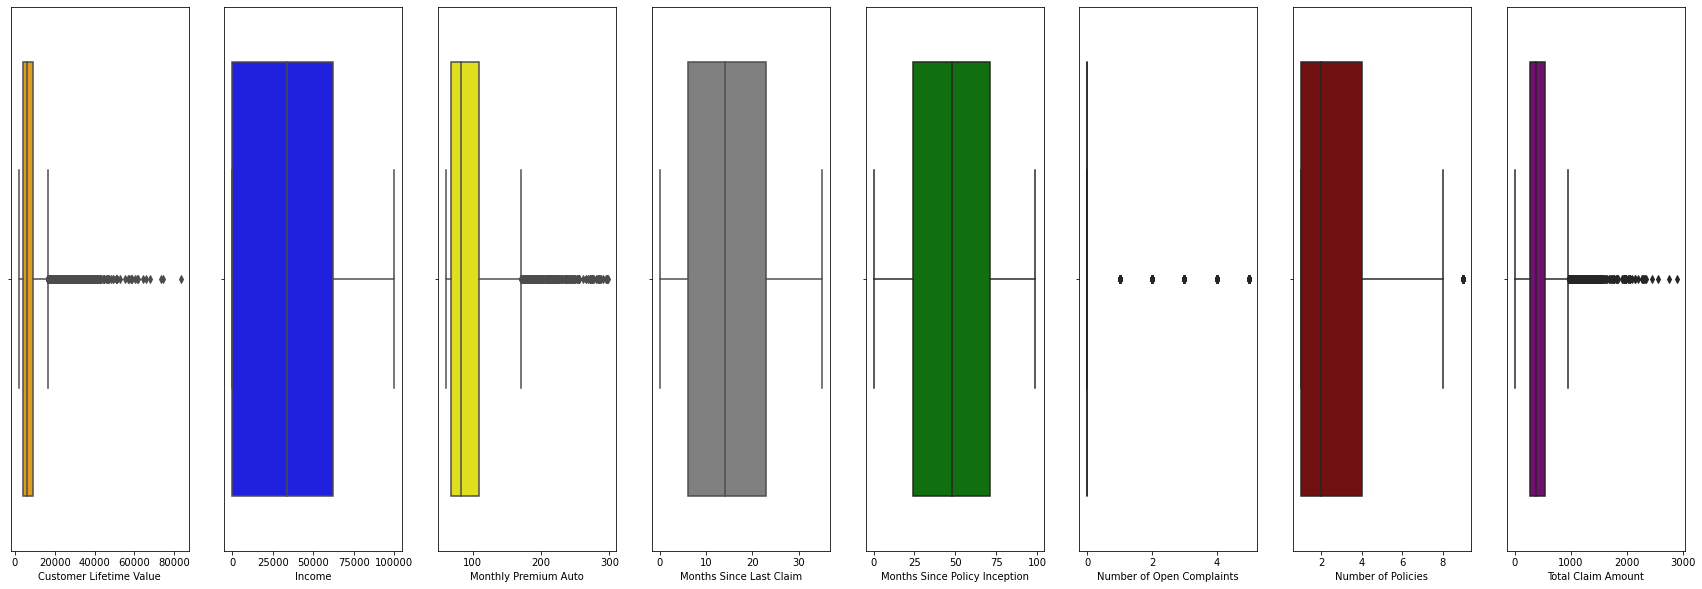

In [353]:
fig, axes = plt.subplots(ncols=8, figsize=(30,10))
box_plot1 = sns.boxplot(df["Customer Lifetime Value"], ax=axes[0], color = 'orange')
box_plot2 = sns.boxplot(df["Income"], ax=axes[1], color = 'blue')
box_plot3 = sns.boxplot(df["Monthly Premium Auto"], ax=axes[2], color = 'Yellow')
box_plot4 = sns.boxplot(df["Months Since Last Claim"], ax=axes[3], color = 'Gray')
box_plot5 = sns.boxplot(df["Months Since Policy Inception"], ax=axes[4], color = 'green')
box_plot6 = sns.boxplot(df["Number of Open Complaints"], ax=axes[5], color = 'green')
box_plot7 = sns.boxplot(df["Number of Policies"], ax=axes[6], color = 'maroon')
box_plot8 = sns.boxplot(df["Total Claim Amount"], ax=axes[7], color = 'purple')

plt.show()

### Feature: Customer Lifetime Value (Target Variable)

In [354]:
print("Target Variable Statistics: ")
df['Customer Lifetime Value'].describe()

Target Variable Statistics: 


count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [355]:
print("Total number of null values:", df['Customer Lifetime Value'].describe().isnull().sum())

Total number of null values: 0


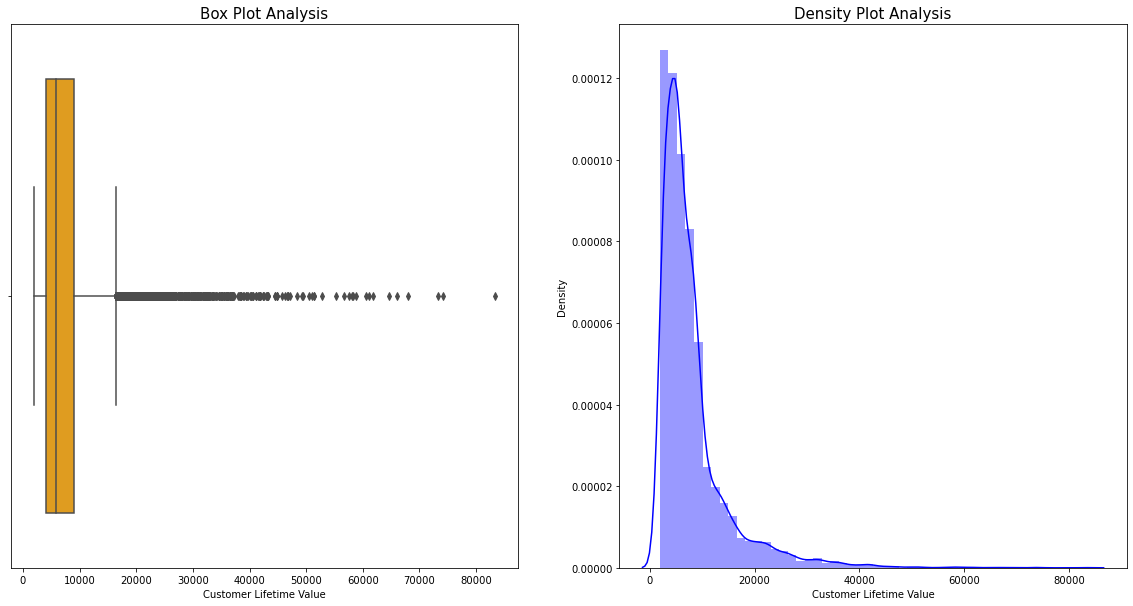

In [356]:
fig, axes = plt.subplots(ncols=2, figsize=(20,10))
box_plot = sns.boxplot(df["Customer Lifetime Value"], ax=axes[0], color = 'orange')
axes[0].set_title("Box Plot Analysis", fontsize=15)
dist_plot = sns.distplot(df["Customer Lifetime Value"], kde=True, ax=axes[1], color = 'blue')
axes[1].set_title("Density Plot Analysis", fontsize=15)
plt.show()

We can infer following:
    
    There are no null values.
    There are few outliers.
    The density plot is skewed towards right, so we will take median for statistical analysis.

### Feature: Response

In [357]:
df[['Customer Lifetime Value', 'Response']].groupby('Response').median()

Customer Lifetime Value
Response                         
No                    5808.463583
Yes                   5597.124960

In [358]:
print("Total number of null values:", df['Response'].describe().isnull().sum())

Total number of null values: 0


Determining the response of each customer based on their vehicle size.

Text(0, 0.5, 'Count')

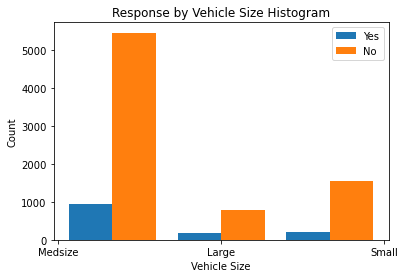

In [359]:
df1 = df[df['Response'] == 'Yes']['Vehicle Size']
df2 = df[df['Response'] == 'No']['Vehicle Size']

plt.hist([df1, df2], bins = 3)
plt.legend(('Yes', 'No'), loc='best')
plt.title('Response by Vehicle Size Histogram')
plt.xlabel('Vehicle Size')
plt.ylabel('Count')

### Feature: Gender

In [360]:
df[['Customer Lifetime Value', 'Gender']].groupby('Gender').median()

Customer Lifetime Value
Gender                         
F                   5737.233278
M                   5815.049178

Plotting Customer Lifetime Value and Income scatter plots segregated on the basis of Gender.

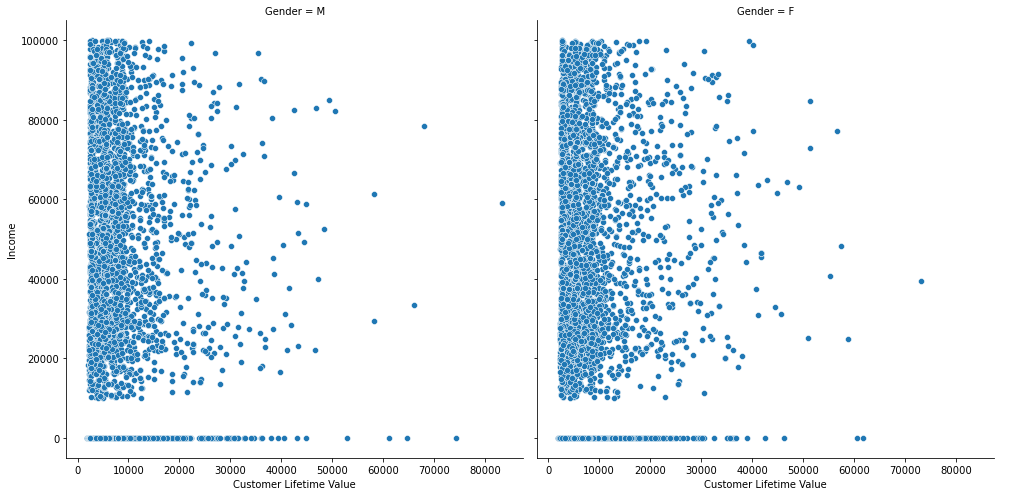

In [361]:
g = sns.FacetGrid(df, col="Gender", height=7)
g.map(sns.scatterplot,'Customer Lifetime Value',  'Income')
g.add_legend()

### Feature: Employment Status

In [362]:
df[['Customer Lifetime Value', 'EmploymentStatus']].groupby('EmploymentStatus').median()

Customer Lifetime Value
EmploymentStatus                         
Disabled                      5611.622761
Employed                      5860.483090
Medical Leave                 5258.924832
Retired                       5550.569379
Unemployed                    5619.689084

Plotting Customer Lifetime Value and Income scatter plots segregated on the basis of Employment Status.

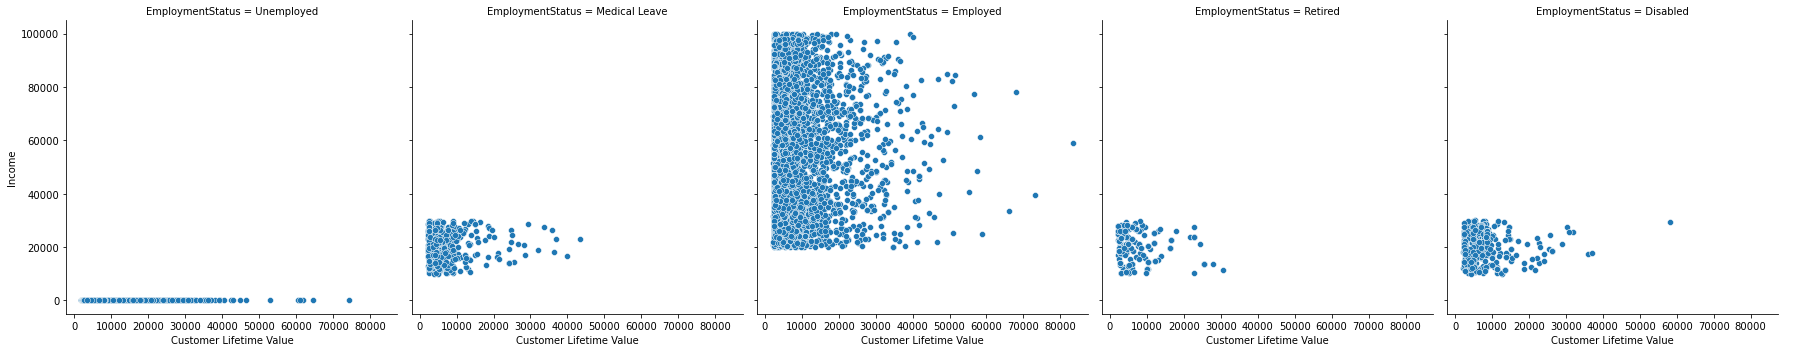

In [363]:
g = sns.FacetGrid(df, col="EmploymentStatus", height=5)
g.map(sns.scatterplot,'Customer Lifetime Value',  'Income')
g.add_legend()

### Feature: Vehicle Class

In [364]:
df[['Customer Lifetime Value', 'Vehicle Class']].groupby('Vehicle Class').median()

Customer Lifetime Value
Vehicle Class                         
Four-Door Car              5320.343098
Luxury Car                14510.443760
Luxury SUV                14395.515695
SUV                        8592.585972
Sports Car                 8554.788501
Two-Door Car               5266.700976

Plotting Customer Lifetime Value and Total Claim Amount scatter plots segregated on the basis of Vehicle Class.

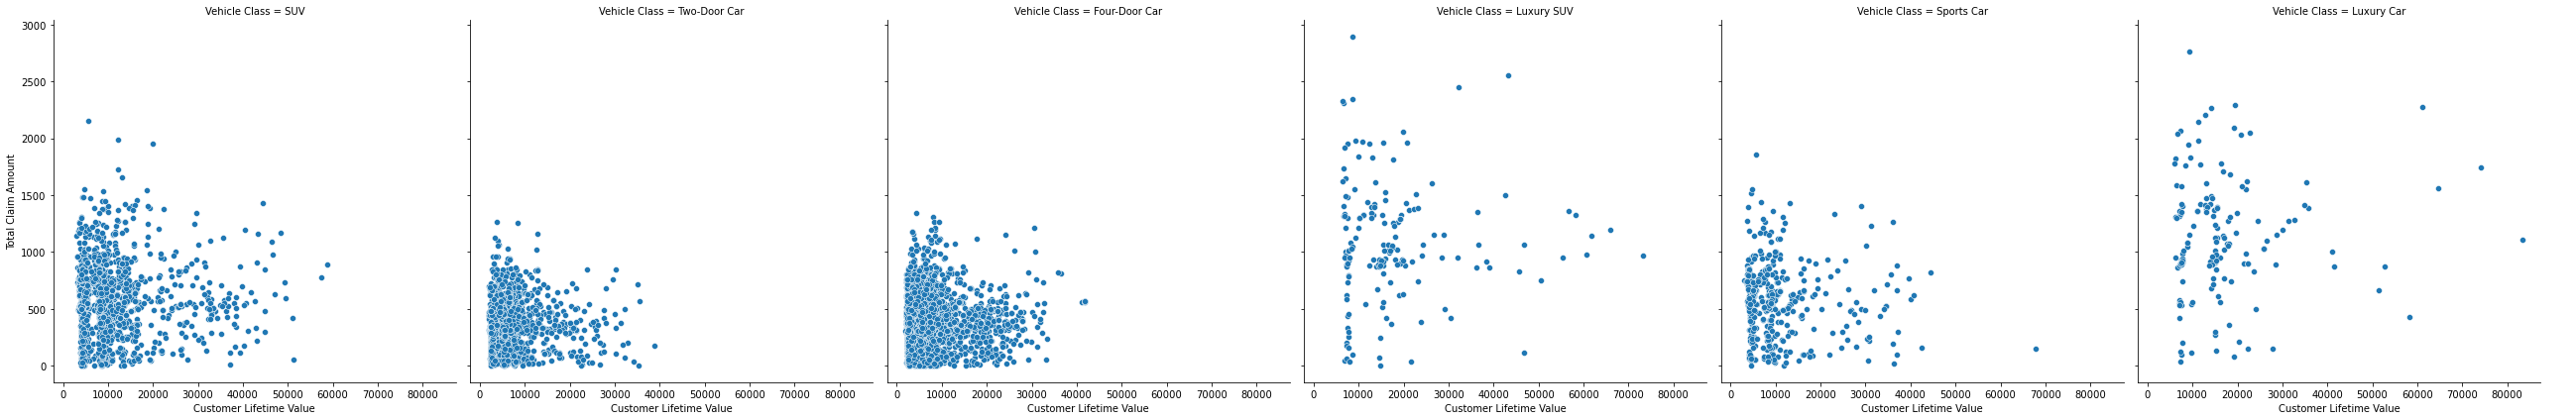

In [365]:
g = sns.FacetGrid(df, col="Vehicle Class", height=6)
g.map(sns.scatterplot,'Customer Lifetime Value',  'Total Claim Amount')
g.add_legend()

### Feature: Monthly Premiuim Auto

In [366]:
print("Statistics: ")
df['Monthly Premium Auto'].describe()

Statistics: 


count    9081.000000
mean       93.218478
std        34.423683
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

In [367]:
print("Total number of null values:", df['Monthly Premium Auto'].describe().isnull().sum())

Total number of null values: 0


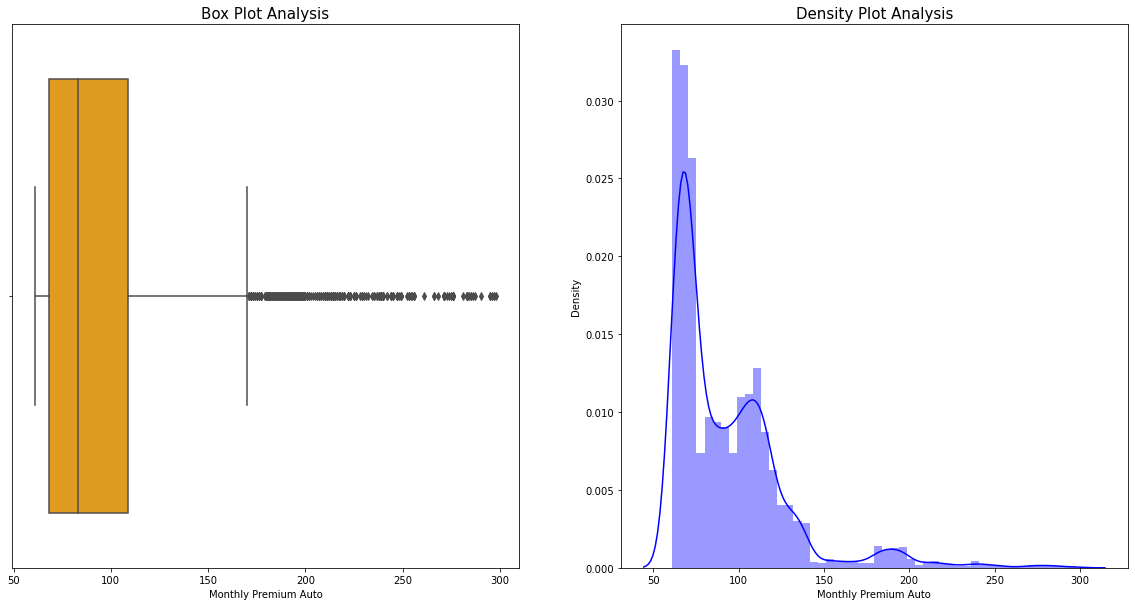

In [368]:
fig, axes = plt.subplots(ncols=2, figsize=(20,10))
box_plot = sns.boxplot(df["Monthly Premium Auto"], ax=axes[0], color = 'orange')
axes[0].set_title("Box Plot Analysis", fontsize=15)
dist_plot = sns.distplot(df["Monthly Premium Auto"], kde=True, ax=axes[1], color = 'blue')
axes[1].set_title("Density Plot Analysis", fontsize=15)
plt.show()

We can infer following:
    
    There are no null values.
    There are few outliers.
    The density plot is skewed towards right, so we will take median for statistical analysis.

### Feature: Total Claim Amount

In [369]:
print("Statistics: ")
df['Total Claim Amount'].describe()

Statistics: 


count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

In [370]:
print("Total number of null values:", df['Total Claim Amount'].describe().isnull().sum())

Total number of null values: 0


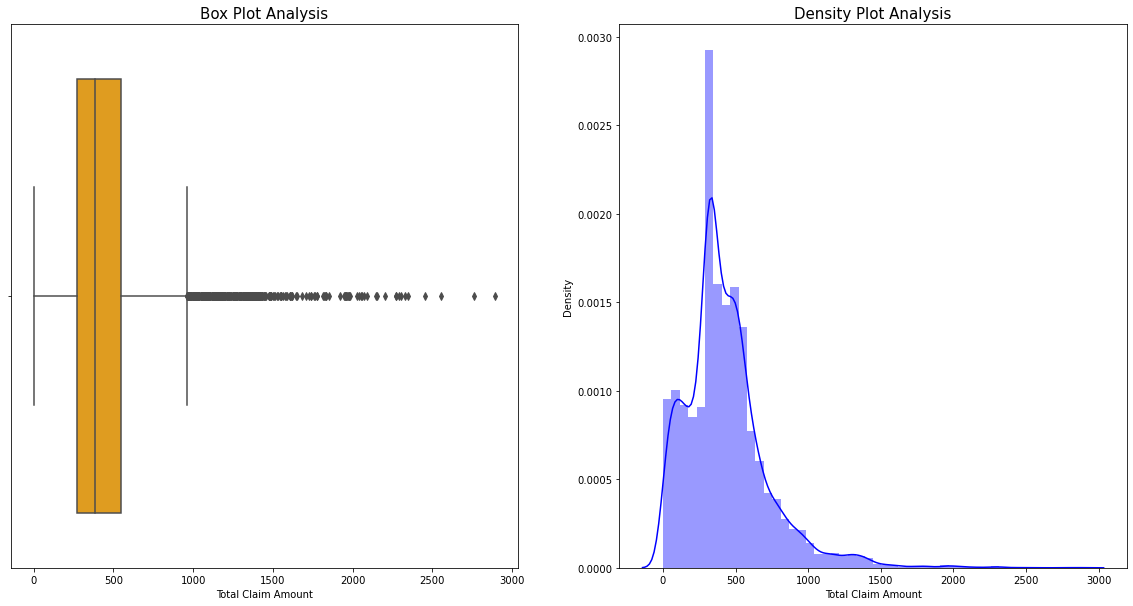

In [371]:
fig, axes = plt.subplots(ncols=2, figsize=(20,10))
box_plot = sns.boxplot(df["Total Claim Amount"], ax=axes[0], color = 'orange')
axes[0].set_title("Box Plot Analysis", fontsize=15)
dist_plot = sns.distplot(df["Total Claim Amount"], kde=True, ax=axes[1], color = 'blue')
axes[1].set_title("Density Plot Analysis", fontsize=15)
plt.show()

We can infer following:
    
    There are no null values.
    There are few outliers.
    The density plot is skewed towards right, so we will take median for statistical analysis.

## Handling Null Values

<AxesSubplot:>

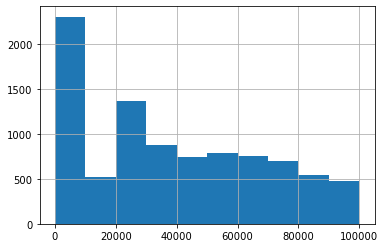

In [372]:
df['Income'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [373]:
df['Income'] = df['Income'].fillna(df['Income'].median())

<AxesSubplot:>

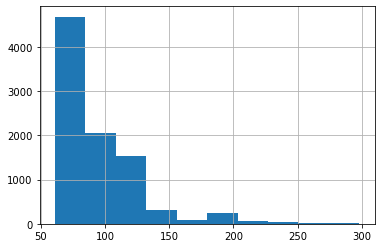

In [374]:
df['Monthly Premium Auto'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [375]:
df['Monthly Premium Auto'] = df['Monthly Premium Auto'].fillna(df['Monthly Premium Auto'].median())

<AxesSubplot:>

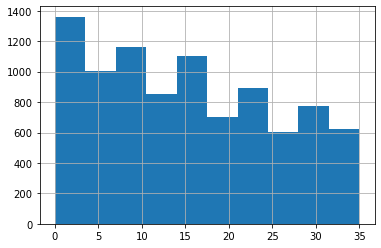

In [376]:
df['Months Since Last Claim'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [377]:
df['Months Since Last Claim'] = df['Months Since Last Claim'].fillna(df['Months Since Last Claim'].median())

<AxesSubplot:>

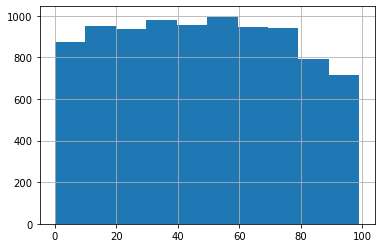

In [378]:
df['Months Since Policy Inception'].hist()

Since the data is uniformly distributed, so we will replace the null values with mean.

In [379]:
df['Months Since Policy Inception'] = df['Months Since Policy Inception'].fillna(df['Months Since Policy Inception'].mean())

<AxesSubplot:>

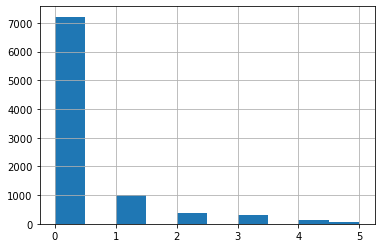

In [380]:
df['Number of Open Complaints'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [381]:
df['Number of Open Complaints'] = df['Number of Open Complaints'].fillna(df['Number of Open Complaints'].median())

<AxesSubplot:>

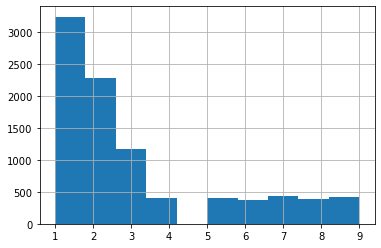

In [382]:
df['Number of Policies'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [383]:
df['Number of Policies'] = df['Number of Policies'].fillna(df['Number of Policies'].median())

<AxesSubplot:>

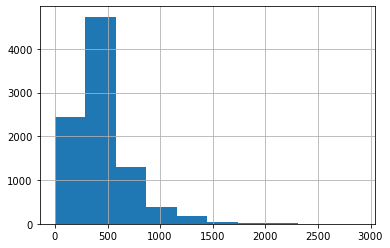

In [384]:
df['Total Claim Amount'].hist()

Since the data is skewed to the right, so we will replace the null values with median.

In [385]:
df['Total Claim Amount'] = df['Total Claim Amount'].fillna(df['Total Claim Amount'].median())

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9087 non-null   object 
 4   Coverage                       9078 non-null   object 
 5   Education                      9048 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9052 non-null   object 
 8   Gender                         9062 non-null   object 
 9   Income                         9134 non-null   float64
 10  Location Code                  9033 non-null   object 
 11  Marital Status                 9062 non-null   object 
 12  Monthly Premium Auto           9134 non-null   f

## Handling Missing Values in Categofrical or Ordinal Variables

<AxesSubplot:>

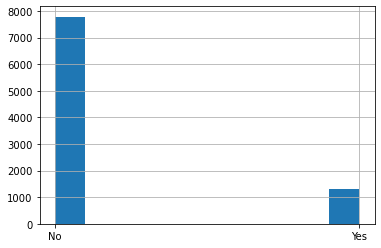

In [387]:
df['Response'].hist()

Since the majority of customers says 'No', so we replace the missing values with mode.

In [388]:
df['Response'] = df['Response'].fillna(df['Response'].mode()[0])

<AxesSubplot:>

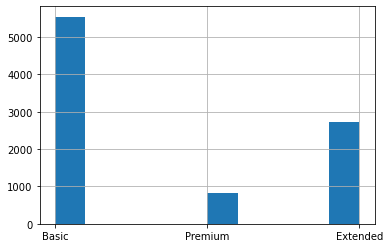

In [389]:
df['Coverage'].hist()

Since the majority of customers have 'Basic' coverage, so we replace the missing values with mode.

In [390]:
df['Coverage'] = df['Coverage'].fillna(df['Coverage'].mode()[0])

<AxesSubplot:>

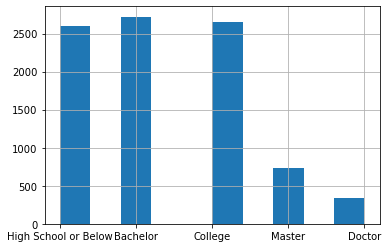

In [391]:
df['Education'].hist()

In [392]:
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

<AxesSubplot:>

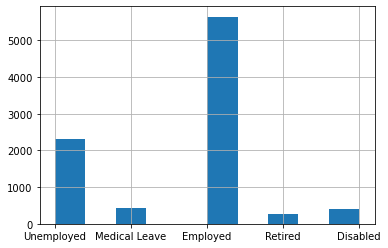

In [393]:
df['EmploymentStatus'].hist()

Since the majority of customers are 'Employed', so we replace the missing values with mode.

In [394]:
df['EmploymentStatus'] = df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0])

<AxesSubplot:>

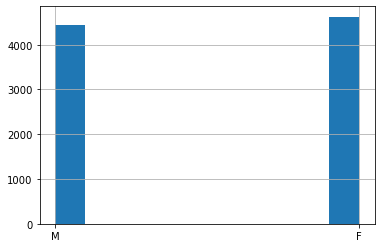

In [395]:
df['Gender'].hist()

Since the majority of customers are 'F', so we replace the missing values with mode.

In [396]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

<AxesSubplot:>

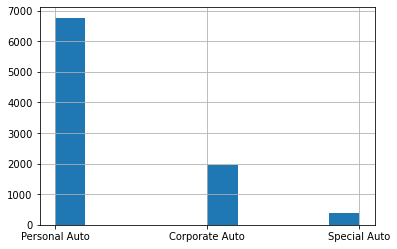

In [397]:
df['Policy Type'].hist()

Since the majority of customers have policy type 'Personal Auto', so we replace the missing values with mode.

In [398]:
df['Policy Type'] = df['Policy Type'].fillna(df['Policy Type'].mode()[0])

<AxesSubplot:>

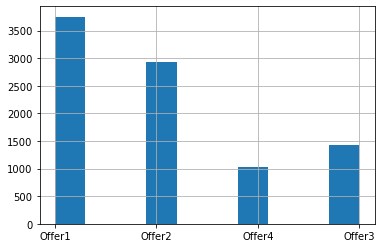

In [399]:
df['Renew Offer Type'].hist()

Since the majority of customers have Renew Offer Type 'Offer 1', so we replace the missing values with mode.

In [400]:
df['Renew Offer Type'] = df['Renew Offer Type'].fillna(df['Renew Offer Type'].mode()[0])

<AxesSubplot:>

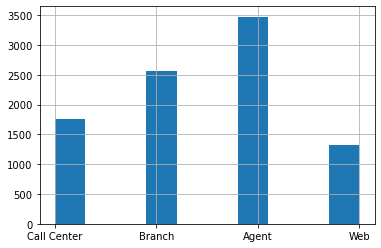

In [401]:
df['Sales Channel'].hist()

Since the majority of customers have sales channel 'Agent', so we replace the missing values with mode.

In [402]:
df['Sales Channel'] = df['Sales Channel'].fillna(df['Sales Channel'].mode()[0])

<AxesSubplot:>

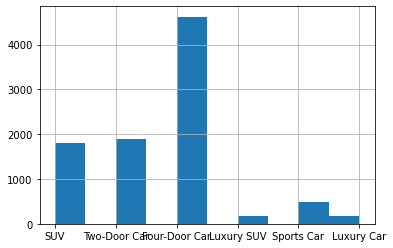

In [403]:
df['Vehicle Class'].hist()

Since the majority of customers have 'Four-Door Car', so we replace the missing values with mode.

In [404]:
df['Vehicle Class'] = df['Vehicle Class'].fillna(df['Vehicle Class'].mode()[0])

<AxesSubplot:>

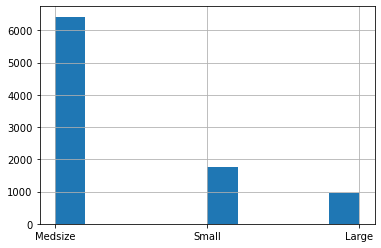

In [405]:
df['Vehicle Size'].hist()

Since the majority of customers have 'Medsize' car, so we replace the missing values with mode.

In [406]:
df['Vehicle Size'] = df['Vehicle Size'].fillna(df['Vehicle Size'].mode()[0])

<AxesSubplot:>

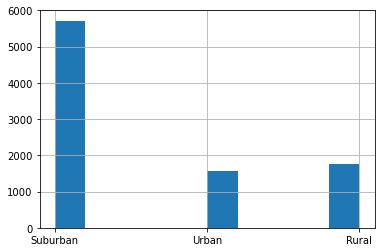

In [407]:
df['Location Code'].hist()

Since the majority of customers are from 'Suburban' location, so we replace the missing values with mode.

In [408]:
df['Location Code'] = df['Location Code'].fillna(df['Location Code'].mode()[0])

<AxesSubplot:>

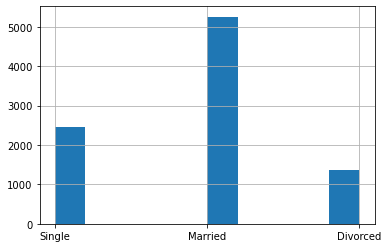

In [409]:
df['Marital Status'].hist()

Since the majority of customers are 'Married', so we replace the missing values with mode.

In [410]:
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

<AxesSubplot:>

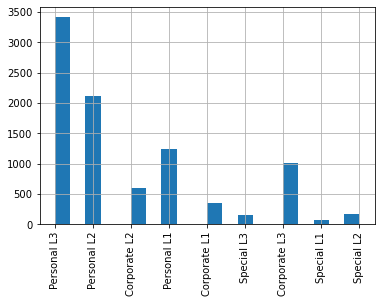

In [411]:
df['Policy'].hist(xrot=90, bins= 20)

Since the majority of customers have 'Personal L3', so we replace the missing values with mode.

In [412]:
df['Policy'] = df['Policy'].fillna(df['Policy'].mode()[0])

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9065 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   float64
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   f

### Dropping non important columns

In [414]:
df = df.drop(['Customer', 'State', 'Effective To Date'], axis=1)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Response                       9134 non-null   object 
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   float64
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Monthly Premium Auto           9134 non-null   float64
 10  Months Since Last Claim        9134 non-null   float64
 11  Months Since Policy Inception  9134 non-null   float64
 12  Number of Open Complaints      9134 non-null   f

### Handling Categorical or Ordinal Variables

#### Plotting histograms for categorical variables

<AxesSubplot:title={'center':'Gender Counts'}>

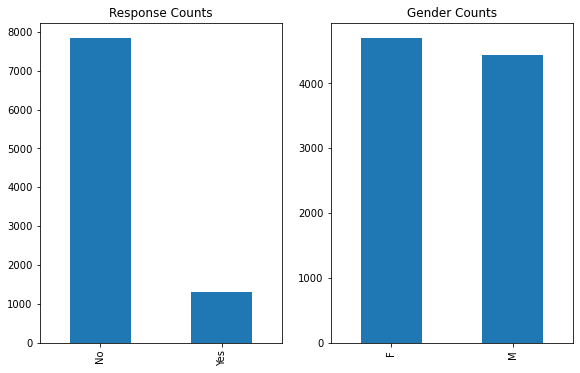

In [416]:
# Set up a grid of plots

plt.rc('figure', figsize=(20, 10))
fizsize_with_subplots = (20, 20)
bin_size = 10

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Response'].value_counts().plot(kind='bar', 
                                         title='Response Counts')
plt.subplot2grid(fig_dims, (0, 1))
df['Gender'].value_counts().plot(kind='bar', 
                                         title='Gender Counts')

The frequent class in column Response is No, so we map 'No' to 1 and 'Yes' to 0.

The frequent class in column Gender is F, so we map 'F' to 1 and 'M' to 0.

In [417]:
df['Response'] = df['Response'].map({'No':1, 'Yes':0}).astype(int)
df['Gender'] = df['Gender'].map({'F':1, 'M':0}).astype(int)

<AxesSubplot:title={'center':'Policy Type Counts'}>

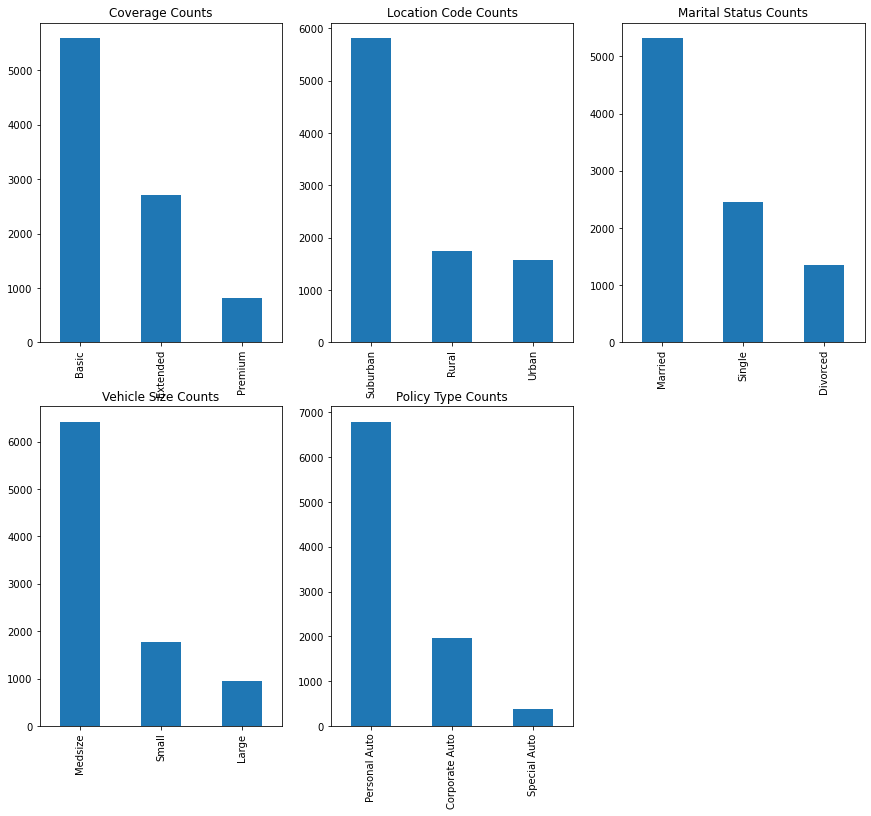

In [418]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Coverage'].value_counts().plot(kind='bar', 
                                         title='Coverage Counts')
plt.subplot2grid(fig_dims, (0, 1))
df['Location Code'].value_counts().plot(kind='bar', 
                                         title='Location Code Counts')

plt.subplot2grid(fig_dims, (0, 2))
df['Marital Status'].value_counts().plot(kind='bar', 
                                         title='Marital Status Counts')

plt.subplot2grid(fig_dims, (1, 0))
df['Vehicle Size'].value_counts().plot(kind='bar', 
                                         title='Vehicle Size Counts')

plt.subplot2grid(fig_dims, (1, 1))
df['Policy Type'].value_counts().plot(kind='bar', 
                                         title='Policy Type Counts')

We replace the columns Coverage, Location Code, Martial Status, Vehicle Size and Policy Type with a one-hot-vector of length 3.

In [419]:
cols = pd.get_dummies(df['Coverage'], prefix= 'Coverage')
df[cols.columns] = cols
df.drop('Coverage', axis = 1, inplace = True)

cols = pd.get_dummies(df['Location Code'], prefix= 'Location Code')
df[cols.columns] = cols
df.drop('Location Code', axis = 1, inplace = True)

cols = pd.get_dummies(df['Marital Status'], prefix= 'Marital Status')
df[cols.columns] = cols
df.drop('Marital Status', axis = 1, inplace = True)

cols = pd.get_dummies(df['Vehicle Size'], prefix= 'Vehicle Size')
df[cols.columns] = cols
df.drop('Vehicle Size', axis = 1, inplace = True)

cols = pd.get_dummies(df['Policy Type'], prefix= 'Policy Type')
df[cols.columns] = cols
df.drop('Policy Type', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Sales Channel Counts'}>

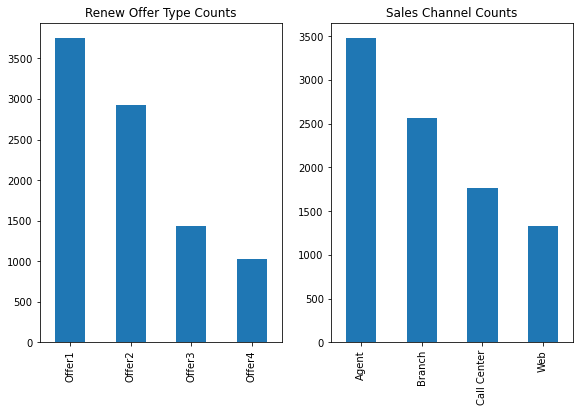

In [420]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Renew Offer Type'].value_counts().plot(kind='bar', 
                                         title='Renew Offer Type Counts')

plt.subplot2grid(fig_dims, (0, 1))
df['Sales Channel'].value_counts().plot(kind='bar', 
                                         title='Sales Channel Counts')

Here, we replace the columns Renew Offer Type and Sales Channel with a one-hot-vector of length 4.

In [421]:
cols = pd.get_dummies(df['Renew Offer Type'], prefix= 'Renew Offer Type')
df[cols.columns] = cols
df.drop('Renew Offer Type', axis = 1, inplace = True)

cols = pd.get_dummies(df['Sales Channel'], prefix= 'Sales Channel')
df[cols.columns] = cols
df.drop('Sales Channel', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Employment Status Counts'}>

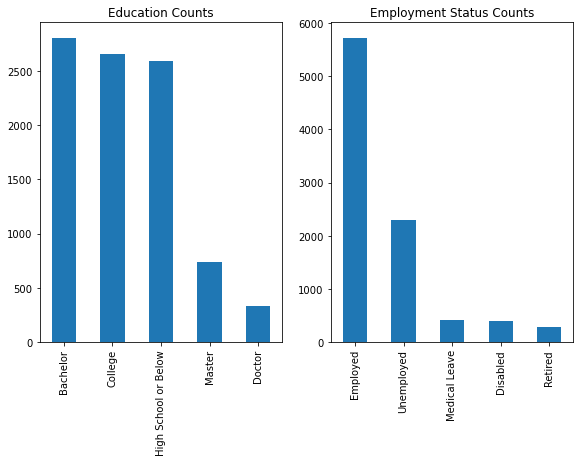

In [422]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Education'].value_counts().plot(kind='bar', 
                                         title='Education Counts')

plt.subplot2grid(fig_dims, (0, 1))
df['EmploymentStatus'].value_counts().plot(kind='bar', 
                                         title='Employment Status Counts')

Now, we replace the columns Education and Employment Status with a one-hot-vector of length 5.

In [423]:
cols = pd.get_dummies(df['Education'], prefix= 'Education')
df[cols.columns] = cols
df.drop('Education', axis = 1, inplace = True)

cols = pd.get_dummies(df['EmploymentStatus'], prefix= 'EmploymentStatus')
df[cols.columns] = cols
df.drop('EmploymentStatus', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Vehicle Class Counts'}>

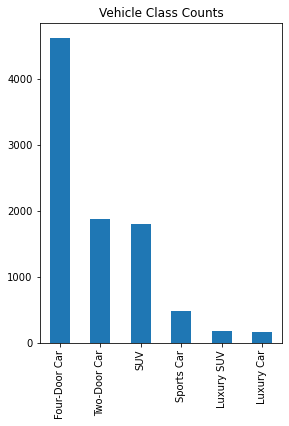

In [424]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Vehicle Class'].value_counts().plot(kind='bar', 
                                         title='Vehicle Class Counts')

Now, we replace the column Vehicle Class with a one-hot-vector of length 6.

In [425]:
cols = pd.get_dummies(df['Vehicle Class'], prefix= 'Vehicle Class')
df[cols.columns] = cols
df.drop('Vehicle Class', axis = 1, inplace = True)

<AxesSubplot:title={'center':'Policy Counts'}>

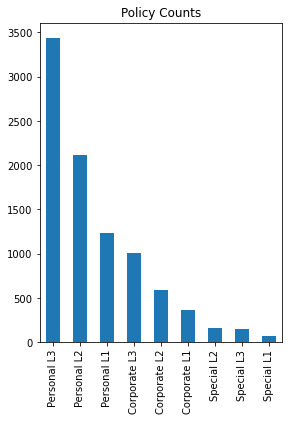

In [426]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 4)

plt.subplot2grid(fig_dims, (0, 0))
df['Policy'].value_counts().plot(kind='bar', 
                                         title='Policy Counts')

Finally, we replace the column Policy with a one-hot-vector of length 9.

In [427]:
cols = pd.get_dummies(df['Policy'], prefix= 'Policy')
df[cols.columns] = cols
df.drop('Policy', axis = 1, inplace = True)

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer Lifetime Value         9134 non-null   float64
 1   Response                        9134 non-null   int64  
 2   Gender                          9134 non-null   int64  
 3   Income                          9134 non-null   float64
 4   Monthly Premium Auto            9134 non-null   float64
 5   Months Since Last Claim         9134 non-null   float64
 6   Months Since Policy Inception   9134 non-null   float64
 7   Number of Open Complaints       9134 non-null   float64
 8   Number of Policies              9134 non-null   float64
 9   Total Claim Amount              9134 non-null   float64
 10  Coverage_Basic                  9134 non-null   uint8  
 11  Coverage_Extended               9134 non-null   uint8  
 12  Coverage_Premium                91

### Splitting the data set

Our Target variable is Customer Lifetime Value

In [429]:
x = df.drop('Customer Lifetime Value', axis = 1)
y = df['Customer Lifetime Value']

Splitting the dataframe into train and test data sets.

In [430]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

### Scalling the data

array([[<AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Income'>,
        <AxesSubplot:xlabel='Months Since Last Claim', ylabel='Income'>,
        <AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Income'>,
        <AxesSubplot:xlabel='Number of Open Complaints', ylabel='Income'>,
        <AxesSubplot:xlabel='Number of Policies', ylabel='Income'>,
        <AxesSubplot:xlabel='Total Claim Amount', ylabel='Income'>],
       [<AxesSubplot:xlabel='Income', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Months Since Last Claim', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Number of Open Complaints', ylabel='Monthly Premium Auto'>,
        <AxesSubplot:xlabel='Number of Policies', ylabel='Monthly Premium Auto'>,
     

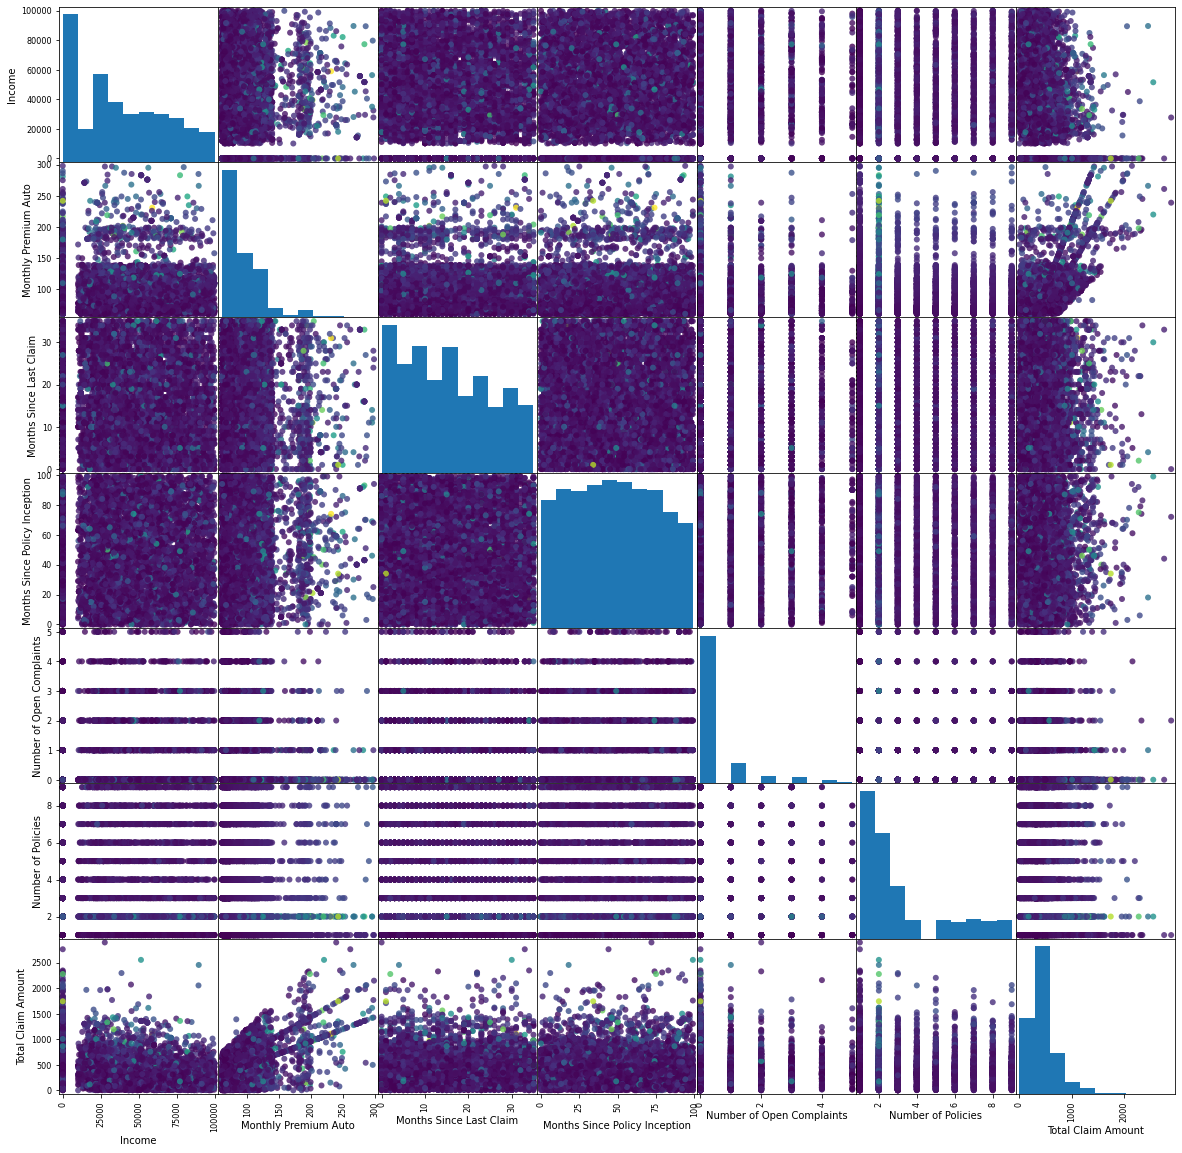

In [431]:
from pandas.plotting import scatter_matrix
attributes = ['Income','Monthly Premium Auto', 'Months Since Last Claim', 
              'Months Since Policy Inception', 'Number of Open Complaints',
              'Number of Policies', 'Total Claim Amount']
scatter_matrix(x[attributes], figsize = (20, 20), c = y, alpha = 0.8, marker = 'O')

In [432]:
x[attributes].describe()

Income  Monthly Premium Auto  Months Since Last Claim  \
count   9134.000000           9134.000000              9134.000000   
mean   37610.040289             93.159185                15.096562   
std    30299.572999             34.332429                10.046987   
min        0.000000             61.000000                 0.000000   
25%        0.000000             68.000000                 6.000000   
50%    33881.000000             83.000000                14.000000   
75%    62049.500000            109.000000                23.000000   
max    99981.000000            298.000000                35.000000   

       Months Since Policy Inception  Number of Open Complaints  \
count                    9134.000000                9134.000000   
mean                       48.052406                   0.383403   
std                        27.802299                   0.910258   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        48.000000                   0.000000   
75%                        71.000000                   0.000000   
max                        99.000000                   5.000000   

       Number of Policies  Total Claim Amount  
count         9134.000000         9134.000000  
mean             2.963652          434.088794  
std              2.387739          290.500092  
min              1.000000            0.099007  
25%              1.000000          272.258244  
50%              2.000000          383.945434  
75%              4.000000          547.514839  
max              9.000000         2893.239678

As we can clearly see that data for almost all the statistical varaibales is not normally distributed, hence we will use MinMaxScaller to scale the data.

In [433]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Final Processed Train and Test Dataset

In [434]:
pd.DataFrame(x_train).head()

0    1         2         3         4         5    6      7         8   \
0  0.0  1.0  0.285184  0.164557  0.114286  0.222222  0.2  0.125  0.165875   
1  1.0  0.0  0.371451  0.092827  0.342857  0.010101  0.4  1.000  0.144198   
2  1.0  1.0  0.000000  0.088608  0.000000  0.282828  0.0  0.000  0.204035   
3  1.0  1.0  0.294916  0.004219  0.542857  0.737374  0.0  0.000  0.002609   
4  1.0  0.0  0.639482  0.540084  0.114286  0.292929  0.0  0.500  0.264388   

    9   ...   47   48   49   50   51   52   53   54   55   56  
0  1.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
1  0.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
2  0.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
4  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 57 columns]

In [435]:
pd.DataFrame(x_test).head()

0    1         2         3         4         5    6      7         8   \
0  1.0  1.0  0.607635  0.025316  0.114286  0.191919  0.0  0.750  0.143100   
1  1.0  1.0  0.682740  0.172996  0.314286  0.818182  0.0  0.375  0.029034   
2  1.0  1.0  0.000000  0.050633  0.342857  0.424242  0.0  0.750  0.274562   
3  1.0  0.0  0.587892  0.274262  0.171429  0.626263  0.0  0.125  0.104362   
4  1.0  0.0  0.788940  0.033755  0.257143  0.676768  0.2  0.375  0.161234   

    9   ...   47   48   49   50   51   52   53   54   55   56  
0  1.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
1  1.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2  1.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 57 columns]

## Machine Learning Models

This function gives us the baseline MAE ans MSE Scores derived from the dataset.

In [436]:
def r2_score(Xtrain, Ytrain, Ytest):
    
    #Residual value
    SS_Residual = sum((Ytrain-Ytest)**2)
    #Sum squared total
    SS_Total = sum((Ytrain-np.mean(Ytrain))**2)
    #R2 value
    r2 = 1 - (float(SS_Residual))/SS_Total
    #Adjusted R2 value
    adjusted_r2 = 1 - (1-r2)*(len(Ytrain)-1)/(len(Ytrain)-Xtrain.shape[1]-1)
    
    return r2, adjusted_r2

This function yields predictive perfomance graph for the test data points as well train datapoints

In [437]:
def predictive_performance(ytrain, ytrain_pred, ytest, ytest_pred, size):
    
    fix ,axes = plt.subplots(ncols=2, figsize=size)

    m, b = np.polyfit(ytrain, ytrain_pred, 1) 
    axes[0].plot(ytrain, m*ytrain + b, color = 'red')        
    axes[0].scatter(ytrain, ytrain_pred, color = 'black')      
    axes[0].set_xlabel("Actual Data", fontsize=15)
    axes[0].set_ylabel("Predicted Value by Model", fontsize=15)
    axes[0].set_title("Train Data", fontsize=20)
    m1, b1 = np.polyfit(ytest, ytest_pred, 1)
    axes[1].plot(ytest, m1*ytest + b1, color = 'red')        
    axes[1].scatter(ytest, ytest_pred)      
    axes[1].set_xlabel("Actual Data", fontsize=15)
    axes[1].set_ylabel("Predicted Value by Model", fontsize=15)
    axes[1].set_title("Test Data", fontsize=20)

    return plt.show()

### Linear Regression

Train Cross-validation scores:
[0.15510942 0.19689443 0.2116099  0.14716685 0.16878687 0.12069963
 0.16574704 0.17048497 0.11963332 0.11107675]
Average Train Cross-validation score:0.15672091803538662


Test Cross-validation scores:
[ 8.29525022e-02  1.03644704e-01  1.96325580e-01  9.43438985e-02
  1.31961434e-01  3.79011160e-03 -1.05373686e+22  2.18891449e-03
  1.90371394e-01  7.47753410e-02]
Average Test Cross-validation score:-1.0537368585395968e+21


Model statistics:
Mean Absolute Error    4146.0026
Mean Squared Error     48838016.1771
R Square               0.1500
Adjusted R Square      0.1226




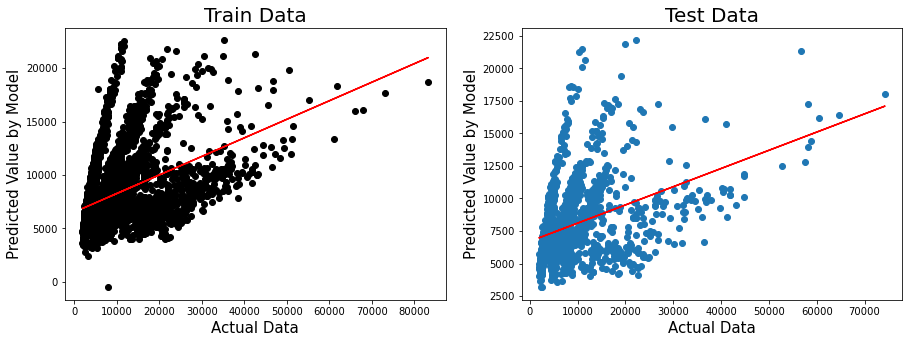

In [330]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

kfold = KFold(n_splits=10)
train_scores = cross_val_score(lreg, x_train, y_train, cv=kfold, scoring = 'r2', n_jobs =-1)
test_scores = cross_val_score(lreg, x_test, y_test, cv=kfold, scoring = 'r2', n_jobs =-1)

print("Train Cross-validation scores:\n{}".format(train_scores))
print("Average Train Cross-validation score:{}".format(train_scores.mean()))
print('\n') 

print("Test Cross-validation scores:\n{}".format(test_scores))
print("Average Test Cross-validation score:{}".format(test_scores.mean())) 
print('\n') 



lreg = LinearRegression().fit(x_train, y_train)

pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)


mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 


predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### KNN Regression

Grid Search with cross validation

In [362]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,2,7,10,15], 
              'weights': ['distance', 'uniform']}
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1, scoring ='r2')

In [363]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:   59.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 7, 10, 15],
                         'weights': ['distance', 'uniform']},
             return_train_score=True, scoring='r2', verbose=4)

In [364]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 15, 'weights': 'distance'}
Best cross-validation score: 0.14


In [365]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.099761      0.003291         1.661540        0.005695   
1       0.092550      0.009340         1.669115        0.015011   
2       0.080142      0.001862         1.809076        0.021648   
3       0.080737      0.002671         1.879844        0.043164   
4       0.083757      0.003444         2.067168        0.018025   

  param_n_neighbors param_weights                                     params  \
0                 1      distance  {'n_neighbors': 1, 'weights': 'distance'}   
1                 1       uniform   {'n_neighbors': 1, 'weights': 'uniform'}   
2                 2      distance  {'n_neighbors': 2, 'weights': 'distance'}   
3                 2       uniform   {'n_neighbors': 2, 'weights': 'uniform'}   
4                 7      distance  {'n_neighbors': 7, 'weights': 'distance'}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0          -0.321865          -0.497977          -0.549508  ...   
1          -0.321865          -0.497977          -0.549508  ...   
2          -0.075885          -0.105194          -0.089004  ...   
3          -0.075861          -0.109969          -0.088580  ...   
4           0.114720           0.100763           0.140209  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -0.496751        0.108120               10            1.000000   
1        -0.496751        0.108120                9            1.000000   
2        -0.112739        0.037323                8            1.000000   
3        -0.111557        0.031462                7            0.621085   
4         0.106101        0.021056                3            1.000000   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000             1.00000            1.000000   
1            1.000000             1.00000            1.000000   
2            1.000000             1.00000            1.000000   
3            0.633027             0.62188            0.629977   
4            1.000000             1.00000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            1.000000          1.000000         0.000000  
2            1.000000          1.000000         0.000000  
3            0.627622          0.626718         0.004613  
4            1.000000          1.000000         0.000000  

[5 rows x 22 columns]

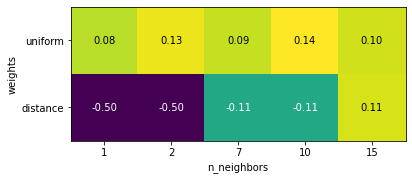

In [366]:
import mglearn
scores = np.array(results.mean_test_score).reshape(2, 5)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='n_neighbors', 
                      xticklabels=param_grid['n_neighbors'], ylabel='weights', 
                      yticklabels=param_grid['weights'], cmap="viridis")

Model statistics:
Mean Absolute Error    3973.2071
Mean Squared Error     50433945.4117
R Square               0.1223
Adjusted R Square      0.0940




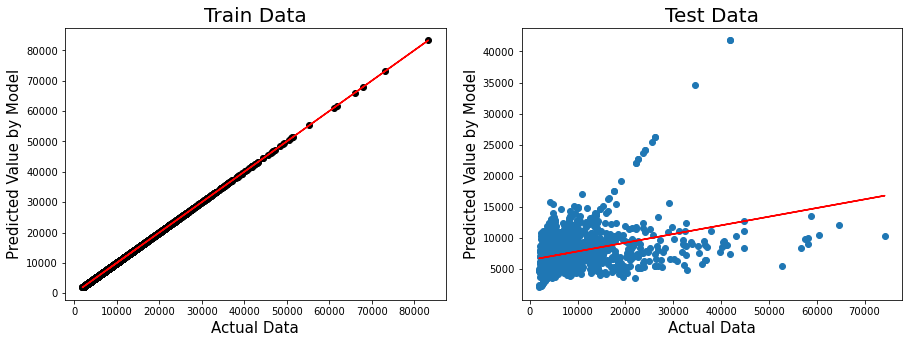

In [367]:
## fitting the model with best output
reg_knn = KNeighborsRegressor(weights = grid_search.best_params_['weights'], 
                              n_neighbors = grid_search.best_params_['n_neighbors'], n_jobs=-1).fit(x_train, y_train)

## output prediction
pred_train = reg_knn.predict(x_train)
pred_test = reg_knn.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Ridge

In [368]:
from sklearn.linear_model import Ridge

x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_train,y_train)
    train_score_list.append(ridge.score(x_train,y_train))
    test_score_list.append(ridge.score(x_test, y_test))

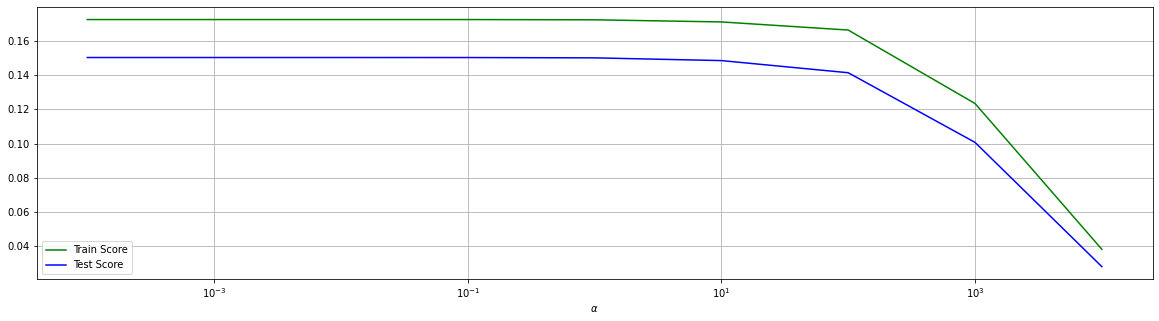

In [369]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [370]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.099761      0.003291         1.661540        0.005695   
1       0.092550      0.009340         1.669115        0.015011   
2       0.080142      0.001862         1.809076        0.021648   
3       0.080737      0.002671         1.879844        0.043164   
4       0.083757      0.003444         2.067168        0.018025   

  param_n_neighbors param_weights                                     params  \
0                 1      distance  {'n_neighbors': 1, 'weights': 'distance'}   
1                 1       uniform   {'n_neighbors': 1, 'weights': 'uniform'}   
2                 2      distance  {'n_neighbors': 2, 'weights': 'distance'}   
3                 2       uniform   {'n_neighbors': 2, 'weights': 'uniform'}   
4                 7      distance  {'n_neighbors': 7, 'weights': 'distance'}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0          -0.321865          -0.497977          -0.549508  ...   
1          -0.321865          -0.497977          -0.549508  ...   
2          -0.075885          -0.105194          -0.089004  ...   
3          -0.075861          -0.109969          -0.088580  ...   
4           0.114720           0.100763           0.140209  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -0.496751        0.108120               10            1.000000   
1        -0.496751        0.108120                9            1.000000   
2        -0.112739        0.037323                8            1.000000   
3        -0.111557        0.031462                7            0.621085   
4         0.106101        0.021056                3            1.000000   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000             1.00000            1.000000   
1            1.000000             1.00000            1.000000   
2            1.000000             1.00000            1.000000   
3            0.633027             0.62188            0.629977   
4            1.000000             1.00000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            1.000000          1.000000         0.000000  
2            1.000000          1.000000         0.000000  
3            0.627622          0.626718         0.004613  
4            1.000000          1.000000         0.000000  

[5 rows x 22 columns]

In [371]:
ridge = Ridge()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2', n_jobs =-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

In [372]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.16


Model statistics:
Mean Absolute Error    4151.2273
Mean Squared Error     48934930.8970
R Square               0.1483
Adjusted R Square      0.1209




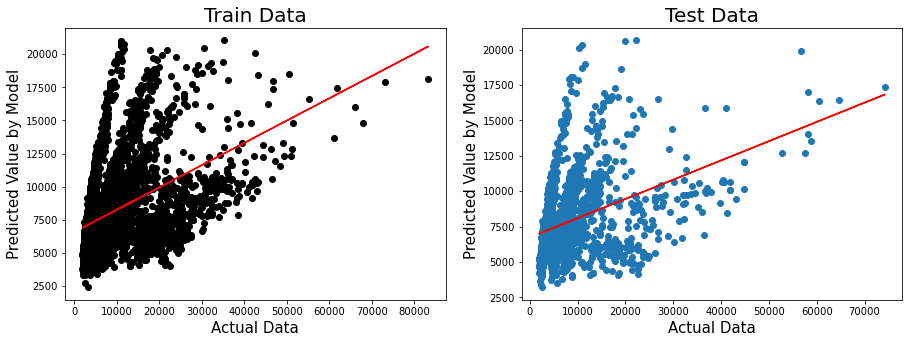

In [373]:
## fitting the model with best output
r_ridge = Ridge(alpha = grid_search.best_params_['alpha']).fit(x_train, y_train)

## output prediction
pred_train = r_ridge.predict(x_train)
pred_test = r_ridge.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Lasso

In [374]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, tol=1)
    lasso.fit(x_train,y_train)
    train_score_list.append(lasso.score(x_train,y_train))
    test_score_list.append(lasso.score(x_test, y_test))

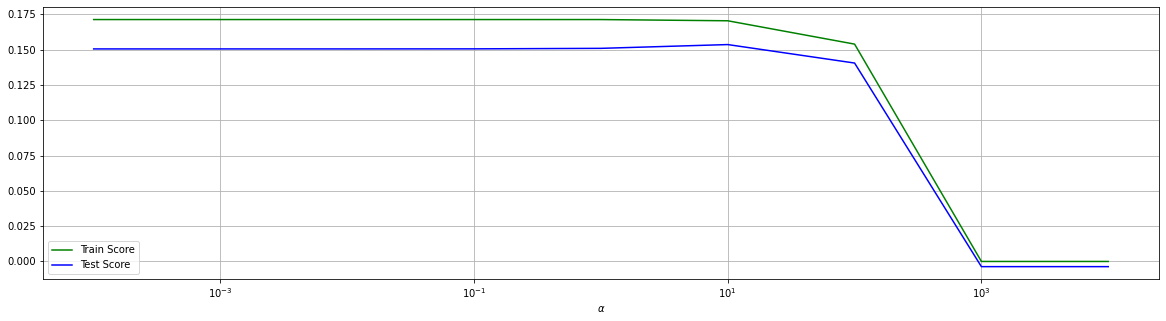

In [375]:
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [376]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009899      0.001327         0.000911        0.000371      0.0001   
1       0.007830      0.001597         0.000697        0.000138       0.001   
2       0.010715      0.003221         0.000961        0.000274        0.01   
3       0.009848      0.002813         0.001048        0.000081         0.1   
4       0.009554      0.001522         0.001268        0.000172           1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.172101           0.171515           0.143926   
1   {'alpha': 0.001}           0.172107           0.171515           0.143927   
2    {'alpha': 0.01}           0.172165           0.171521           0.143932   
3     {'alpha': 0.1}           0.172664           0.171574           0.143987   
4       {'alpha': 1}           0.174495           0.171657           0.144492   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.165536  ...         0.153684        0.021738                6   
1           0.165542  ...         0.153687        0.021739                5   
2           0.165604  ...         0.153718        0.021748                4   
3           0.166152  ...         0.153989        0.021827                3   
4           0.168498  ...         0.155096        0.022113                2   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.168136            0.170355            0.176931   
1            0.168136            0.170355            0.176931   
2            0.168136            0.170355            0.176931   
3            0.168133            0.170349            0.176927   
4            0.168004            0.170121            0.176737   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.170813            0.184412          0.174129         0.005912  
1            0.170813            0.184412          0.174129         0.005912  
2            0.170813            0.184412          0.174129         0.005912  
3            0.170801            0.184404          0.174123         0.005911  
4            0.170400            0.184111          0.173875         0.005892  

[5 rows x 21 columns]

In [377]:
lasso = Lasso(tol=1)

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2', n_jobs =-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(tol=1), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

In [378]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.16


Model statistics:
Mean Absolute Error    4140.6349
Mean Squared Error     48745586.0153
R Square               0.1516
Adjusted R Square      0.1243




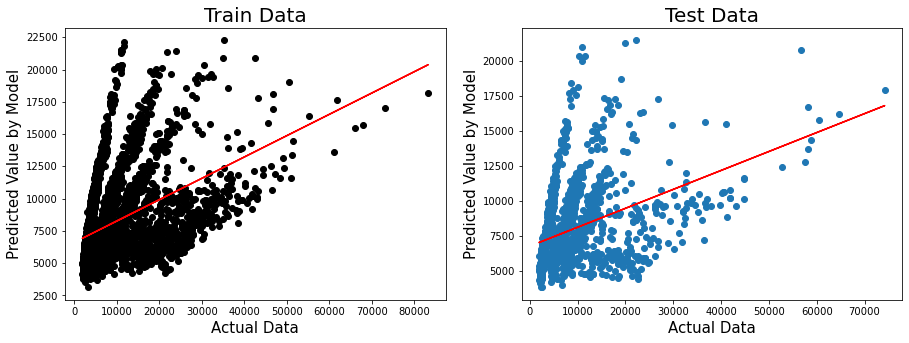

In [379]:
## fitting the model with best output
r_lasso = Lasso(alpha = grid_search.best_params_['alpha']).fit(x_train, y_train)

## output prediction
pred_train = r_lasso.predict(x_train)
pred_test = r_lasso.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### LinearSVR

In [380]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             "loss" : ["epsilon_insensitive", "squared_epsilon_insensitive"]}

lsvr = LinearSVR(tol = 1)
grid_search = GridSearchCV(lsvr, param_grid, cv=5, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)

In [381]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=LinearSVR(tol=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive']},
             return_train_score=True, scoring='r2', verbose=4)

In [382]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'loss': 'squared_epsilon_insensitive'}
Best cross-validation score: 0.13


In [383]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.007563      0.000723         0.000595        0.000027   0.001   
1       0.008041      0.001298         0.000921        0.000187   0.001   
2       0.010753      0.001468         0.001110        0.000194    0.01   
3       0.009761      0.001545         0.001211        0.000271    0.01   
4       0.009405      0.000852         0.000780        0.000173     0.1   

                    param_loss  \
0          epsilon_insensitive   
1  squared_epsilon_insensitive   
2          epsilon_insensitive   
3  squared_epsilon_insensitive   
4          epsilon_insensitive   

                                              params  split0_test_score  \
0        {'C': 0.001, 'loss': 'epsilon_insensitive'}          -1.276316   
1  {'C': 0.001, 'loss': 'squared_epsilon_insensit...           0.147091   
2         {'C': 0.01, 'loss': 'epsilon_insensitive'}          -1.158506   
3  {'C': 0.01, 'loss': 'squared_epsilon_insensiti...           0.122939   
4          {'C': 0.1, 'loss': 'epsilon_insensitive'}          -0.381371   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0          -1.335675          -1.453613  ...        -1.394432        0.074728   
1           0.131620           0.125265  ...         0.129284        0.017641   
2          -1.213516          -1.321653  ...        -1.266326        0.067892   
3           0.031589           0.059598  ...         0.054066        0.042250   
4          -0.416566          -0.449819  ...        -0.424110        0.024783   

   rank_test_score  split0_train_score  split1_train_score  \
0               14           -1.421005           -1.403530   
1                1            0.137634            0.139719   
2               13           -1.290619           -1.274438   
3                2            0.103262            0.058931   
4               11           -0.432599           -0.432072   

   split2_train_score  split3_train_score  split4_train_score  \
0           -1.373937           -1.374554           -1.375537   
1            0.144859            0.142052            0.148843   
2           -1.247248           -1.248937           -1.248921   
3            0.086496            0.048166            0.077701   
4           -0.413957           -0.419175           -0.415146   

   mean_train_score  std_train_score  
0         -1.389713         0.019234  
1          0.142622         0.003933  
2         -1.262033         0.017510  
3          0.074911         0.019578  
4         -0.422590         0.008145  

[5 rows x 22 columns]

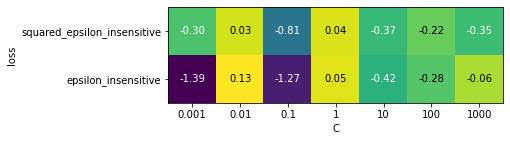

In [384]:
import mglearn
scores = np.array(results.mean_test_score).reshape(2, 7)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='C', 
                      xticklabels=param_grid['C'], ylabel='loss', 
                      yticklabels=param_grid['loss'], cmap="viridis")

Model statistics:
Mean Absolute Error    4349.8851
Mean Squared Error     50208278.1966
R Square               0.1262
Adjusted R Square      0.0980




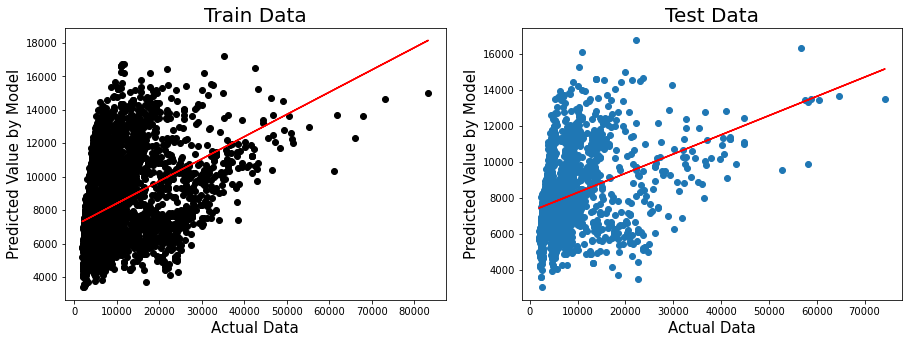

In [385]:
## fitting the model with best output
r_lin = LinearSVR(C = grid_search.best_params_['C'],
                    loss = grid_search.best_params_['loss'], 
                    tol = 1).fit(x_train, y_train)

## output prediction
pred_train = r_lin.predict(x_train)
pred_test = r_lin.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### SVR (Kernel = Linear)

In [386]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'kernel':['linear']}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1)

In [387]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   20.3s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   26.6s finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear']},
             return_train_score=True, verbose=4)

In [388]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'kernel': 'linear'}
Best cross-validation score: 0.04


In [389]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       3.616603      0.012169         0.639894        0.019107   0.001   
1       3.522456      0.159548         0.627150        0.004985    0.01   
2       3.345291      0.013866         0.622031        0.002290     0.1   
3       3.521517      0.095492         0.645026        0.014883       1   
4       3.429885      0.272095         0.657022        0.012866      10   

  param_kernel                            params  split0_test_score  \
0       linear  {'C': 0.001, 'kernel': 'linear'}          -0.091932   
1       linear   {'C': 0.01, 'kernel': 'linear'}          -0.090999   
2       linear    {'C': 0.1, 'kernel': 'linear'}          -0.082296   
3       linear      {'C': 1, 'kernel': 'linear'}          -0.037573   
4       linear     {'C': 10, 'kernel': 'linear'}           0.046863   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0          -0.096811          -0.113438  ...        -0.102945        0.011802   
1          -0.095843          -0.113083  ...        -0.102052        0.011935   
2          -0.086866          -0.104451  ...        -0.093627        0.012029   
3          -0.039588          -0.058256  ...        -0.046310        0.012223   
4           0.055301           0.030752  ...         0.042624        0.021810   

   rank_test_score  split0_train_score  split1_train_score  \
0                6           -0.101337           -0.101518   
1                5           -0.100355           -0.100528   
2                4           -0.091246           -0.091323   
3                3           -0.045586           -0.043224   
4                1            0.044927            0.045420   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.100298           -0.104336           -0.104639   
1           -0.099912           -0.103156           -0.103606   
2           -0.091359           -0.095452           -0.095302   
3           -0.044908           -0.047853           -0.043289   
4            0.045665            0.043073            0.047476   

   mean_train_score  std_train_score  
0         -0.102426         0.001737  
1         -0.101511         0.001546  
2         -0.092936         0.001994  
3         -0.044972         0.001707  
4          0.045312         0.001413  

[5 rows x 22 columns]

Model statistics:
Mean Absolute Error    3853.1958
Mean Squared Error     56678308.9744
R Square               0.0136
Adjusted R Square      -0.0182




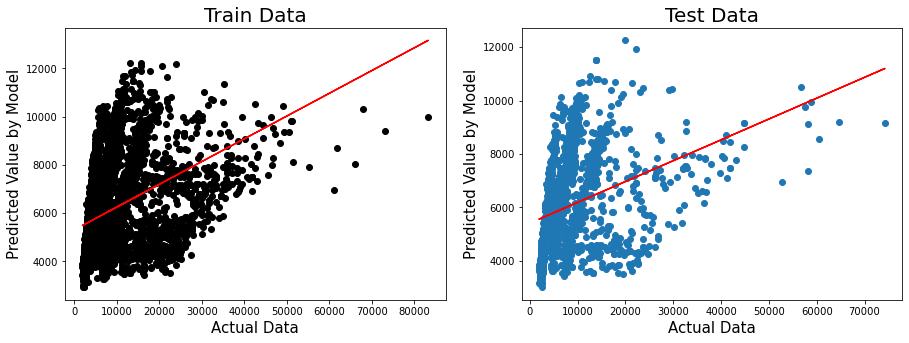

In [390]:
r_svrlin = SVR(C = grid_search.best_params_['C'],
                    kernel = 'linear', 
                    tol = 1).fit(x_train, y_train)

## output prediction
pred_train = r_svrlin.predict(x_train)
pred_test = r_svrlin.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### SVR(Kernel = Poly)

In [427]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 1, 10], 
              'kernel':['poly']}

svr = SVR(cache_size = 14000)
grid_search = GridSearchCV(svr, param_grid, cv=2, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)

In [428]:
grid_search.fit(x_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  18 | elapsed:    9.8s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  1.3min remaining:   30.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.1min finished


GridSearchCV(cv=2, estimator=SVR(cache_size=14000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['poly']},
             return_train_score=True, scoring='r2', verbose=4)

In [429]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'poly'}
Best cross-validation score: 0.12


In [430]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.392053      0.025745         0.939545        0.008307     0.1   
1       1.442366      0.007605         0.960167        0.005915     0.1   
2      85.297993     10.406355         0.834323        0.052152     0.1   
3       1.416062      0.007367         0.951151        0.005094       1   
4       1.890413      0.030482         0.925699        0.000917       1   

  param_gamma param_kernel                                      params  \
0         0.1         poly  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}   
1           1         poly    {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}   
2          10         poly   {'C': 0.1, 'gamma': 10, 'kernel': 'poly'}   
3         0.1         poly    {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}   
4           1         poly      {'C': 1, 'gamma': 1, 'kernel': 'poly'}   

   split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0          -0.096017          -0.106888        -0.101452        0.005436   
1           0.045355           0.042680         0.044018        0.001337   
2          -0.086959          -0.191673        -0.139316        0.052357   
3          -0.089056          -0.098976        -0.094016        0.004960   
4           0.066361           0.059491         0.062926        0.003435   

   rank_test_score  split0_train_score  split1_train_score  mean_train_score  \
0                6           -0.095069           -0.107085         -0.101077   
1                3            0.059366            0.061536          0.060451   
2                7            0.763060            0.795434          0.779247   
3                5           -0.087593           -0.099005         -0.093299   
4                2            0.122769            0.149049          0.135909   

   std_train_score  
0         0.006008  
1         0.001085  
2         0.016187  
3         0.005706  
4         0.013140

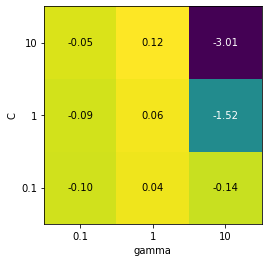

In [431]:
import mglearn
scores = np.array(results.mean_test_score).reshape(3, 3)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', 
                      xticklabels=param_grid['gamma'], ylabel='C', 
                      yticklabels=param_grid['C'], cmap="viridis")

Model statistics:
Mean Absolute Error    3484.3684
Mean Squared Error     51226138.4232
R Square               0.1085
Adjusted R Square      0.0797




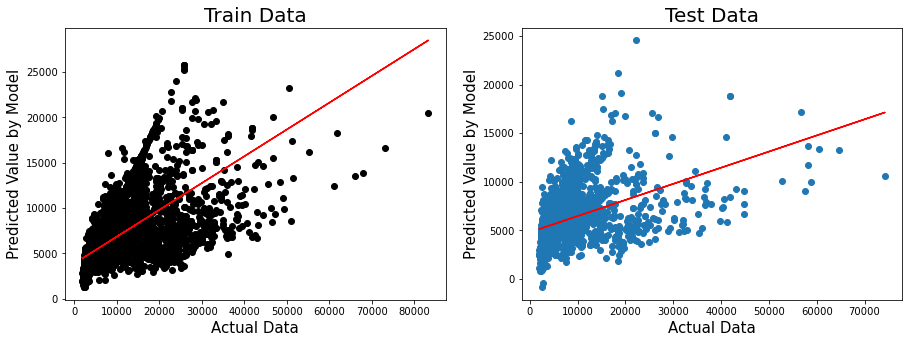

In [432]:
r_svrpoly = SVR(C = grid_search.best_params_['C'],
                    gamma = grid_search.best_params_['gamma'],
                    kernel = 'poly', cache_size = 8000).fit(x_train, y_train)

## output prediction
pred_train = r_svrpoly.predict(x_train)
pred_test = r_svrpoly.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### SVR (Kernel = rbf)

In [391]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001 ,0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.1, 1, 10, 100, 1000], 
              'kernel':['rbf']}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)

In [392]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.6min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='r2', verbose=4)

In [393]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.05


In [394]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       4.846999      0.017344         0.876118        0.007152   0.001   
1       4.915844      0.097845         0.867172        0.017234   0.001   
2       4.934541      0.013521         0.851827        0.007095   0.001   
3       5.580439      0.152147         1.015044        0.048575   0.001   
4       4.698599      0.127080         0.996028        0.085182   0.001   

  param_gamma param_kernel                                         params  \
0       0.001          rbf  {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}   
1         0.1          rbf    {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}   
2           1          rbf      {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}   
3          10          rbf     {'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}   
4         100          rbf    {'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}   

   split0_test_score  split1_test_score  ...  mean_test_score  std_test_score  \
0          -0.092031          -0.096886  ...        -0.103036         0.01179   
1          -0.092026          -0.096883  ...        -0.103031         0.01179   
2          -0.092031          -0.096886  ...        -0.103036         0.01179   
3          -0.092031          -0.096886  ...        -0.103036         0.01179   
4          -0.092031          -0.096886  ...        -0.103036         0.01179   

   rank_test_score  split0_train_score  split1_train_score  \
0               32           -0.101441           -0.101594   
1               28           -0.101435           -0.101590   
2               33           -0.101441           -0.101594   
3               34           -0.101441           -0.101594   
4               35           -0.101441           -0.101594   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.100339           -0.104469           -0.104750   
1           -0.100338           -0.104463           -0.104744   
2           -0.100339           -0.104469           -0.104750   
3           -0.100339           -0.104469           -0.104750   
4           -0.100339           -0.104469           -0.104750   

   mean_train_score  std_train_score  
0         -0.102519         0.001764  
1         -0.102514         0.001762  
2         -0.102519         0.001764  
3         -0.102519         0.001764  
4         -0.102519         0.001764  

[5 rows x 23 columns]

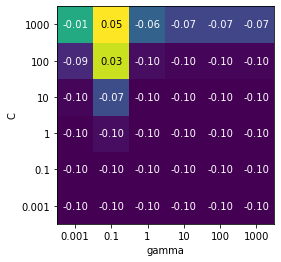

In [395]:
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', 
                      xticklabels=param_grid['gamma'], ylabel='C', 
                      yticklabels=param_grid['C'], cmap="viridis")

Model statistics:
Mean Absolute Error    3614.8669
Mean Squared Error     56519758.2581
R Square               0.0163
Adjusted R Square      -0.0154




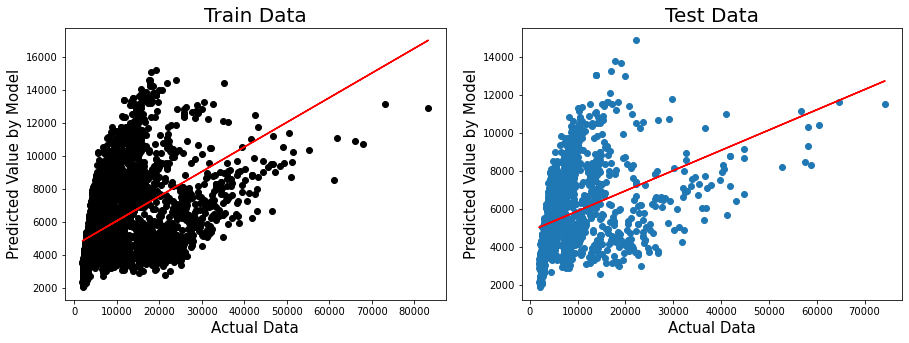

In [396]:
r_svrrbf = SVR(C = grid_search.best_params_['C'],
               gamma = grid_search.best_params_['gamma'],
               kernel = 'rbf', tol = 1).fit(x_train, y_train)

## output prediction
pred_train = r_svrrbf.predict(x_train)
pred_test = r_svrrbf.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Decision Tree Regression

In [412]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[50, 100, 200, 300, 500, 1000],
              'min_samples_split':[100, 200, 300, 400, 500], 
              'min_samples_leaf':[1,2,3,4,5],
              'max_leaf_nodes':[1,2,3,4,5, None],
              'max_features' : ["auto", "sqrt", "log2"]}

clf = DecisionTreeRegressor()
grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1)

In [413]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1184 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 3920 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 7456 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 11760 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 13500 out of 13500 | elapsed:   42.1s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 200, 300, 500, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [100, 200, 300, 400, 500]},
             return_train_score=True, verbose=4)

In [414]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 50, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 500}
Best cross-validation score: 0.66


In [415]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.009987      0.001632              0.0             0.0   
1       0.009031      0.002111              0.0             0.0   
2       0.006418      0.001593              0.0             0.0   
3       0.005287      0.000430              0.0             0.0   
4       0.005446      0.000862              0.0             0.0   

  param_max_depth param_max_features param_max_leaf_nodes  \
0              50               auto                    1   
1              50               auto                    1   
2              50               auto                    1   
3              50               auto                    1   
4              50               auto                    1   

  param_min_samples_leaf param_min_samples_split  \
0                      1                     100   
1                      1                     200   
2                      1                     300   
3                      1                     400   
4                      1                     500   

                                              params  ...  mean_test_score  \
0  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
1  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
2  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
3  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
4  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0             NaN             2700                 NaN                 NaN   
1             NaN             2344                 NaN                 NaN   
2             NaN             2325                 NaN                 NaN   
3             NaN             2306                 NaN                 NaN   
4             NaN             2310                 NaN                 NaN   

   split2_train_score  split3_train_score  split4_train_score  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   mean_train_score  std_train_score  
0               NaN              NaN  
1               NaN              NaN  
2               NaN              NaN  
3               NaN              NaN  
4               NaN              NaN  

[5 rows x 25 columns]

Model statistics:
Mean Absolute Error    1964.4023
Mean Squared Error     19618142.7632
R Square               0.6586
Adjusted R Square      0.6476




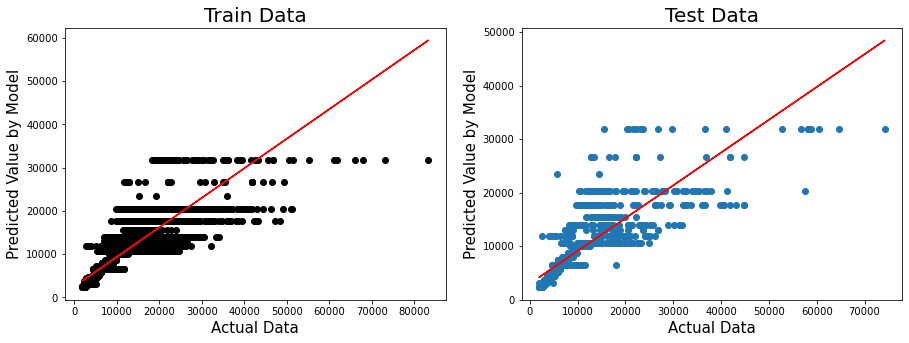

In [418]:
r_dec= DecisionTreeRegressor(max_depth = grid_search.best_params_['max_depth'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'], 
                             max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             max_features = grid_search.best_params_['max_features']).fit(x_train, y_train)

## output prediction
pred_train = r_dec.predict(x_train)
pred_test = r_dec.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Random Forest

In [419]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[50, 100, 200, 300, 500, 1000],
              'min_samples_split':[100, 200, 300, 400, 500], 
              'min_samples_leaf':[1,2,3,4,5],
              'max_leaf_nodes':[1,2,3,4,5, None],
              'max_features' : ["auto", "sqrt", "log2"]
              }

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)

In [420]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1044 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1369 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1856 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2273 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2802 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3485 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 4288 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 5021 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 5842 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 6625 tasks      | e

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 200, 300, 500, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='r2', verbose=4)

In [421]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 300, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 100}
Best cross-validation score: 0.69


In [422]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.049879      0.002089              0.0             0.0   
1       0.062887      0.001898              0.0             0.0   
2       0.060908      0.010429              0.0             0.0   
3       0.066501      0.003229              0.0             0.0   
4       0.076626      0.019243              0.0             0.0   

  param_max_depth param_max_features param_max_leaf_nodes  \
0              50               auto                    1   
1              50               auto                    1   
2              50               auto                    1   
3              50               auto                    1   
4              50               auto                    1   

  param_min_samples_leaf param_min_samples_split  \
0                      1                     100   
1                      1                     200   
2                      1                     300   
3                      1                     400   
4                      1                     500   

                                              params  ...  mean_test_score  \
0  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
1  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
2  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
3  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
4  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0             NaN             2700                 NaN                 NaN   
1             NaN             2259                 NaN                 NaN   
2             NaN             2267                 NaN                 NaN   
3             NaN             2265                 NaN                 NaN   
4             NaN             2263                 NaN                 NaN   

   split2_train_score  split3_train_score  split4_train_score  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   mean_train_score  std_train_score  
0               NaN              NaN  
1               NaN              NaN  
2               NaN              NaN  
3               NaN              NaN  
4               NaN              NaN  

[5 rows x 25 columns]

Model statistics:
Mean Absolute Error    1807.0304
Mean Squared Error     18199175.3328
R Square               0.6833
Adjusted R Square      0.6731




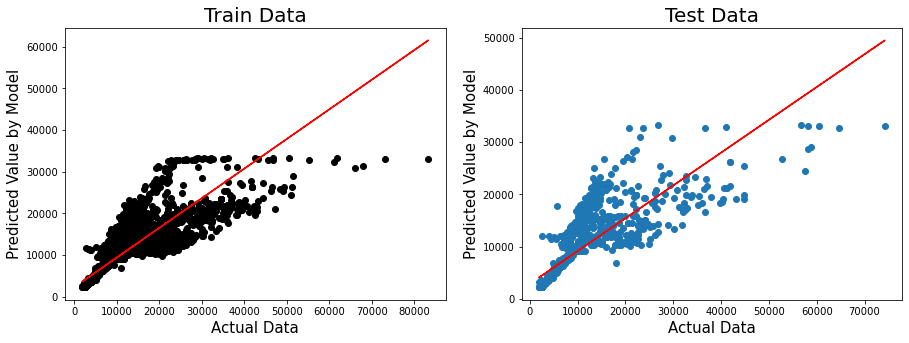

In [423]:
r_rand= RandomForestRegressor(max_depth = grid_search.best_params_['max_depth'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'], 
                             max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             max_features = grid_search.best_params_['max_features']).fit(x_train, y_train)

## output prediction
pred_train = r_rand.predict(x_train)
pred_test = r_rand.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

We can clearly see that RandomForestRegressor outperforms every other model with the followin results on the test data set:
    
    Mean Absolute Error    1807.0304
    Mean Squared Error     18199175.3328
    R Square               0.6833
    Adjusted R Square      0.6731

### FINAL MODEL: Random Forest

The best regressor for this dataset is RandomForestRegressor with following hyperparameters:

    max_depth: 300 
    max_features: auto
    max_leaf_nodes: None
    min_samples_leaf: 2 
    min_samples_split: 100

Training the model on the entire dataset with the best parameters.

Model statistics:
Mean Absolute Error    1806.4164
Mean Squared Error     18121427.4459
R Square               0.6846
Adjusted R Square      0.6745




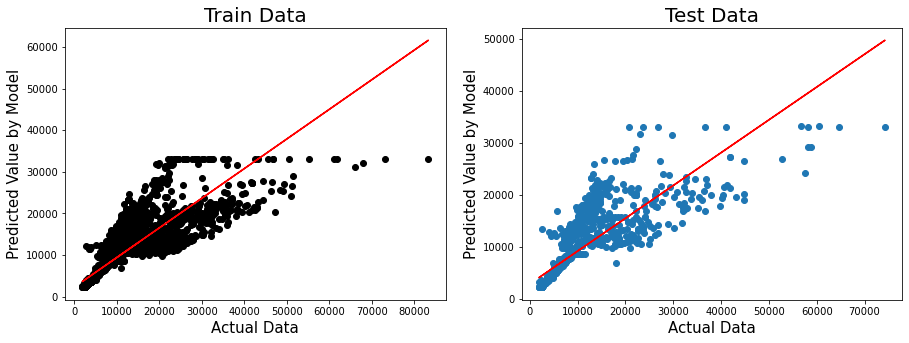

In [773]:
r_final= RandomForestRegressor(max_depth = 300, 
                             min_samples_split = 100, 
                             max_leaf_nodes = None,
                             min_samples_leaf = 2,
                             max_features = 'auto', n_jobs=-1).fit(x_train, y_train)

## output prediction
pred_train = r_final.predict(x_train)
pred_test = r_final.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(x_test, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### RESULTS 

After training the model on the train dataset we got the following results:
    
    Mean Absolute Error    1806.4164
    Mean Squared Error     18121427.4459
    R Square               0.6846
    Adjusted R Square      0.6745

### Bagging

#### Bagging Regressor with Decision Tree Regression

Mean Absolute Error    2042.4688
Mean Squared Error     22443328.0234
R Square               0.6094
Adjusted R Square      0.5968


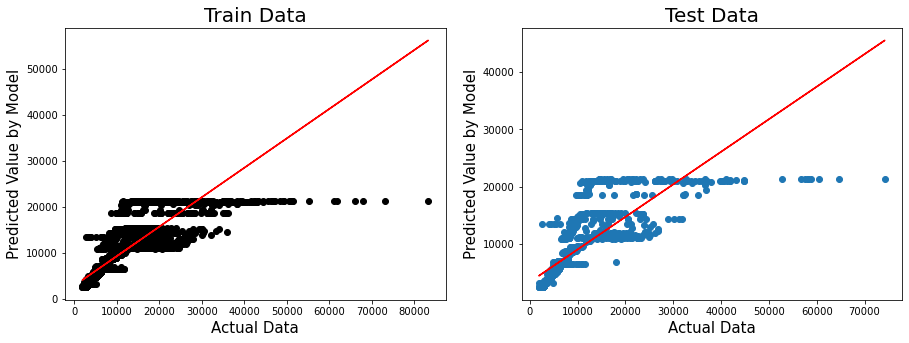

In [109]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf_bag_r = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth = 50, max_features = 'auto', 
                                                                  max_leaf_nodes = None, min_samples_leaf = 2, 
                                                                  min_samples_split = 500, random_state = 42), bootstrap = True, n_estimators = 100)
clf_bag_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

#### Bagging Regressor with Random Forest Regression

Mean Absolute Error    1840.3129
Mean Squared Error     18468855.3796
R Square               0.6786
Adjusted R Square      0.6682


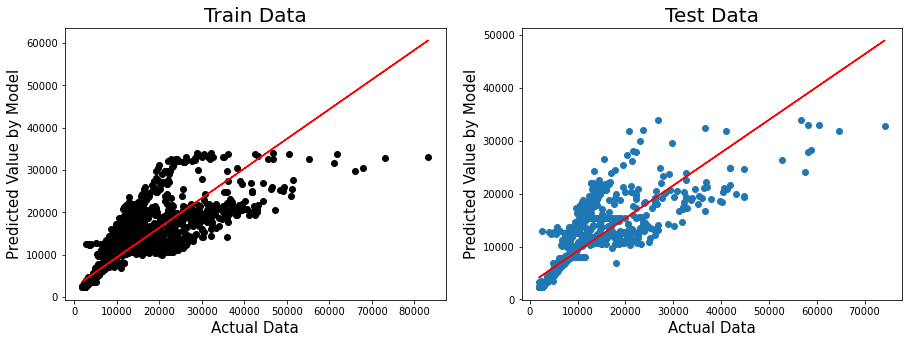

In [112]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

clf_bag_r = BaggingRegressor(base_estimator=RandomForestRegressor(max_depth = 300, 
                             min_samples_split = 100, 
                             max_leaf_nodes = None,
                             min_samples_leaf = 2,
                             max_features = 'auto', n_jobs=-1, random_state = 0), bootstrap = True, n_estimators = 100)
clf_bag_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

### Pasting

#### Pasting with Decision Tree Regressor

Mean Absolute Error    1964.4023
Mean Squared Error     19618142.7632
R Square               0.6586
Adjusted R Square      0.6476


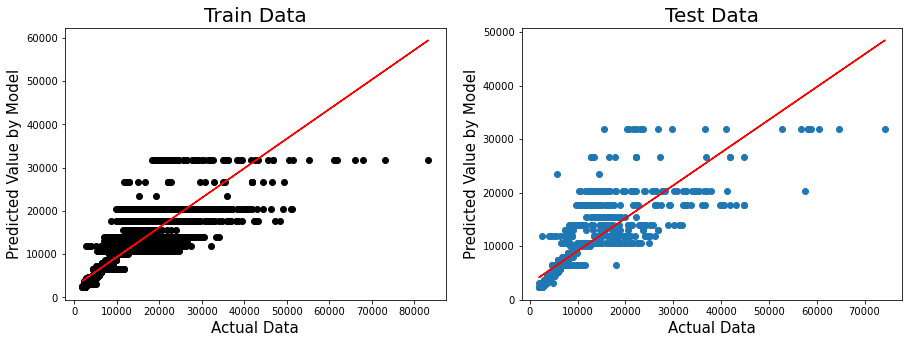

In [114]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf_bag_r = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth = 50, max_features = 'auto', 
                                                                  max_leaf_nodes = None, min_samples_leaf = 2, 
                                                                  min_samples_split = 500, random_state = 42), bootstrap = False, n_estimators = 100)
clf_bag_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

#### Pasting with Random Forest Regressor

Mean Absolute Error    1805.7133
Mean Squared Error     18152284.2999
R Square               0.6841
Adjusted R Square      0.6739


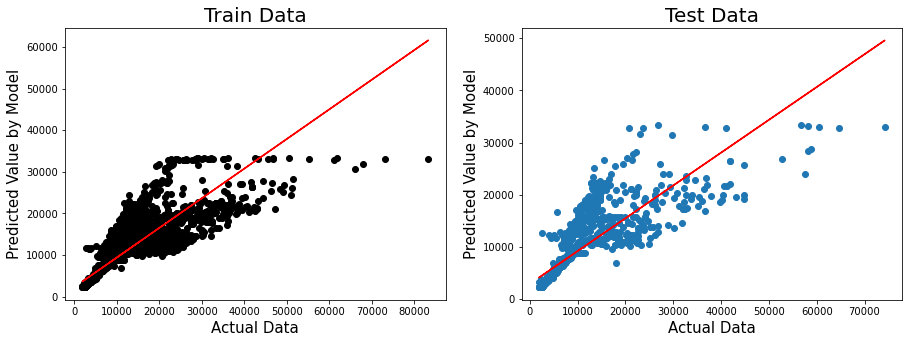

In [116]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

clf_bag_r = BaggingRegressor(base_estimator=RandomForestRegressor(max_depth = 300, 
                             min_samples_split = 100, 
                             max_leaf_nodes = None,
                             min_samples_leaf = 2,
                             max_features = 'auto', n_jobs=-1, random_state = 0), bootstrap = False, n_estimators = 100)
clf_bag_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

### Boosting

#### AdaBoost on Decision Tree Regressor

Mean Absolute Error    1968.2965
Mean Squared Error     18367999.9212
R Square               0.6803
Adjusted R Square      0.6700


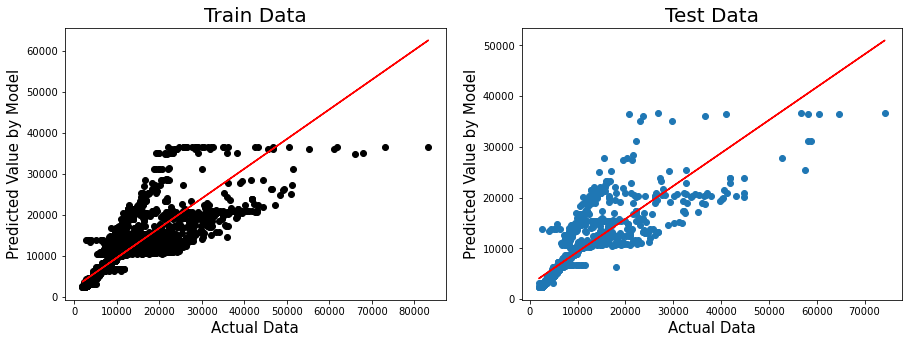

In [117]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

clf_bag_r = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth = 50, max_features = 'auto', 
                                                                  max_leaf_nodes = None, min_samples_leaf = 2, 
                                                                  min_samples_split = 500, random_state = 42), learning_rate=0.01, n_estimators = 100)
clf_bag_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

#### AdaBoost on Random Forest Regressor

Mean Absolute Error    1835.1540
Mean Squared Error     17506005.7351
R Square               0.6953
Adjusted R Square      0.6855


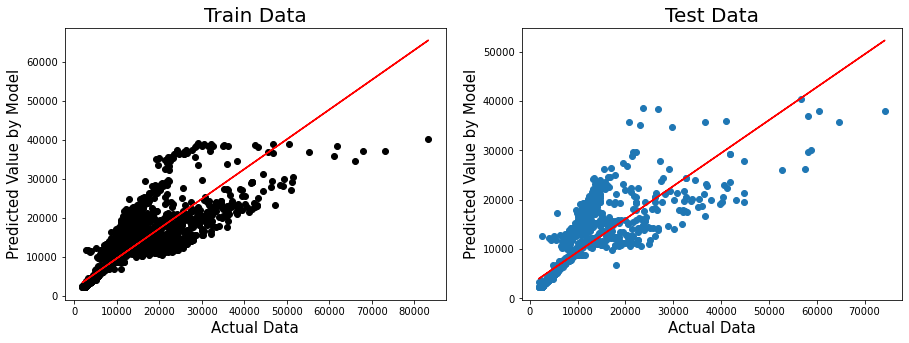

In [438]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

clf_ab_r = AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth = 300, 
                             min_samples_split = 100, 
                             max_leaf_nodes = None,
                             min_samples_leaf = 2,
                             max_features = 'auto', n_jobs=-1, random_state = 0), learning_rate=0.01, n_estimators = 100)
clf_ab_r.fit(x_train, y_train)

## output prediction
ypred_tr = clf_ab_r.predict(x_train)
ypred_te = clf_ab_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

### Gradient Boosting

Mean Absolute Error    1902.3821
Mean Squared Error     19739694.2072
R Square               0.6565
Adjusted R Square      0.6454


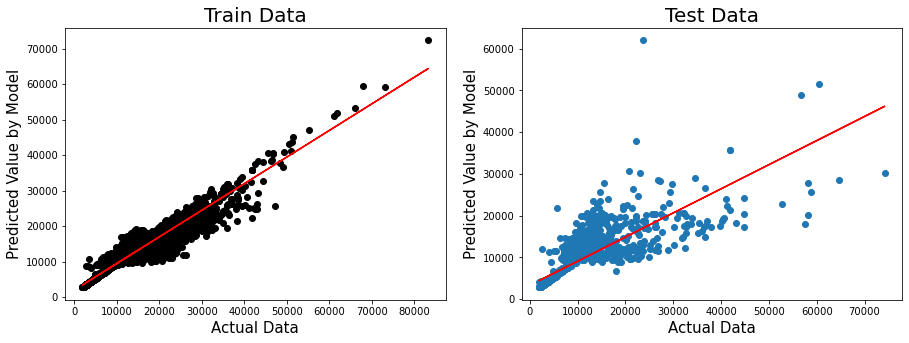

In [126]:
from sklearn.ensemble import GradientBoostingRegressor

clf_bag_r = GradientBoostingRegressor(learning_rate=0.01, n_estimators=200, subsample=1.0, min_samples_split=3, min_samples_leaf=1, max_depth=10)
clf_bag_r.fit(x_train, y_train)
## output prediction
ypred_tr = clf_bag_r.predict(x_train)
ypred_te = clf_bag_r.predict(x_test)


## mean absolute error
mae = mean_absolute_error(y_test, ypred_te)
## mean squared error
mse = mean_squared_error(y_test, ypred_te)
## getting r2 and adjusted r2 values
r2, adjusted_r2 = r2_score(x_test, y_test, ypred_te)

print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))

predictive_performance(y_train, ypred_tr, y_test, ypred_te, (15,5))

### PCA

In [197]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

## getting components
train_comp = pca.fit_transform(x_train)
test_comp = pca.transform(x_test)

## creating train dataframe
train_df = pd.DataFrame(data = train_comp)
train_df.head()

0         1         2         3         4         5         6   \
0  0.021446 -0.307884 -0.585490 -0.870506  0.488204 -0.622629 -0.786447   
1  0.529419 -0.510613  0.723713  0.540715  0.477414 -0.680294 -0.009041   
2  1.591578 -0.286152  0.927626  0.355249 -0.697203  0.158807 -0.551414   
3 -1.229741 -0.494914 -0.521209  0.016034 -0.689643 -0.124227 -0.012215   
4 -0.075098 -0.519317 -0.323922  1.427632 -0.088963 -0.037681 -0.220005   

         7         8         9   ...        22        23        24        25  \
0 -0.174717 -0.585558 -0.772993  ... -0.272567  0.594843 -0.464160 -0.027690   
1  0.934387  0.331186  0.758010  ... -0.488904 -0.217674  0.186942 -0.172525   
2  0.011955 -0.149809 -0.943319  ... -0.205380 -0.092226 -0.031066  0.078101   
3  0.607233 -0.619281  0.714838  ... -0.119549 -0.180092 -0.076337  0.048037   
4 -0.614836  1.000962  0.423698  ... -0.007641 -0.104374 -0.018018 -0.036398   

         26        27        28        29        30        31  
0  0.072493 -0.033244  0.120874  0.617744  0.045401 -0.101063  
1  0.607494 -0.248928  0.199120  0.211449 -0.199072  0.026060  
2 -0.302120 -0.140548  0.129880  0.167810 -0.320282  0.193692  
3 -0.312595  0.158793 -0.123175 -0.069729  0.103818 -0.100811  
4  0.124411 -0.245801  0.223117  0.165756  0.232860  0.419076  

[5 rows x 32 columns]

In [198]:
## creating test dataframe
test_df = pd.DataFrame(data = test_comp)
test_df.head()

0         1         2         3         4         5         6   \
0 -0.234368 -0.174641 -0.259173  0.656511 -0.286186  0.873561 -0.020095   
1 -1.214894 -0.175700 -0.336698  0.338529 -0.022530 -0.035853 -0.569085   
2  1.452743 -0.198915 -0.494457  0.135237 -0.678372 -0.395776  0.533620   
3 -0.538040  0.537157  1.081006  0.512414  1.036523  0.875592  0.217527   
4 -0.489929 -0.577524 -0.497818 -0.932029  0.006497  0.921326  0.471271   

         7         8         9   ...        22        23        24        25  \
0 -0.732436 -0.273349 -0.563480  ... -0.139423 -0.415206  0.228228 -0.093348   
1 -0.547256  0.382553 -0.297407  ...  0.056369 -0.282009  0.071222  0.055990   
2 -0.235905 -0.456368 -0.457493  ... -0.132551 -0.164827  0.083374 -0.141361   
3 -0.493619  0.791313 -0.148620  ... -0.339604  0.007506 -0.328338  1.053007   
4  0.008403 -0.007723  0.512887  ...  0.070164  0.425845  0.164112  0.002061   

         26        27        28        29        30        31  
0  0.260304 -0.408856  0.147204  0.164283 -0.195910  0.096093  
1 -0.164472 -0.249018  0.088675 -0.178229  0.852772  0.599061  
2  0.277825 -0.284611 -0.020873 -0.012511 -0.070247 -0.030227  
3  0.066177  0.226871  0.786231 -0.147021 -0.087081 -0.321797  
4  0.015718 -0.350414  0.054315 -0.171107  0.086976 -0.102991  

[5 rows x 32 columns]

#### Linear Regression with PCA

Train Cross-validation scores:
[0.11331293 0.14857201 0.16866593 0.1223166  0.11264464 0.10552542
 0.11675526 0.14992815 0.11083172 0.107554  ]
Average Train Cross-validation score:0.12561066624304973


Test Cross-validation scores:
[0.10078204 0.13307144 0.07186926 0.13638088 0.16705572 0.0331828
 0.02844412 0.07793655 0.09062415 0.06260055]
Average Test Cross-validation score:0.09019475158991783


Model statistics:
Mean Absolute Error    4267.3474
Mean Squared Error     51037557.0059
R Square               0.1117
Adjusted R Square      0.0959




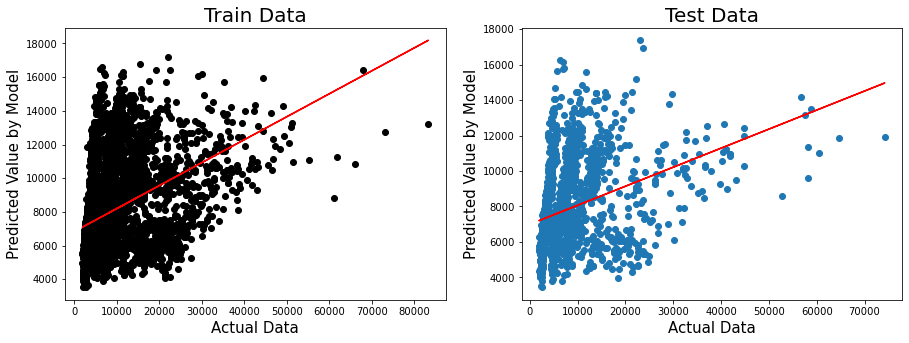

In [199]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

kfold = KFold(n_splits=10)
train_scores = cross_val_score(lreg, train_df, y_train, cv=kfold, scoring = 'r2', n_jobs =-1)
test_scores = cross_val_score(lreg, test_df, y_test, cv=kfold, scoring = 'r2', n_jobs =-1)

print("Train Cross-validation scores:\n{}".format(train_scores))
print("Average Train Cross-validation score:{}".format(train_scores.mean()))
print('\n') 

print("Test Cross-validation scores:\n{}".format(test_scores))
print("Average Test Cross-validation score:{}".format(test_scores.mean())) 
print('\n') 



lreg = LinearRegression().fit(train_df, y_train)

pred_train = lreg.predict(train_df)
pred_test = lreg.predict(test_df)


mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 


predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

#### KNN Regression with PCA

In [200]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,2,7,10,15], 
              'weights': ['distance', 'uniform']}
grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1, scoring ='r2')
grid_search.fit(train_df, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:   36.2s remaining:    1.5s


Best parameters: {'n_neighbors': 15, 'weights': 'distance'}
Best cross-validation score: 0.13


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   36.6s finished


In [201]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.017504      0.003047         1.130914        0.017014   
1       0.023037      0.005097         1.070678        0.042924   
2       0.022447      0.004780         1.196167        0.014515   
3       0.022915      0.001273         1.194619        0.015194   
4       0.022656      0.000456         1.340222        0.016439   

  param_n_neighbors param_weights                                     params  \
0                 1      distance  {'n_neighbors': 1, 'weights': 'distance'}   
1                 1       uniform   {'n_neighbors': 1, 'weights': 'uniform'}   
2                 2      distance  {'n_neighbors': 2, 'weights': 'distance'}   
3                 2       uniform   {'n_neighbors': 2, 'weights': 'uniform'}   
4                 7      distance  {'n_neighbors': 7, 'weights': 'distance'}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0          -0.481942          -0.586110          -0.610098  ...   
1          -0.481942          -0.586110          -0.610098  ...   
2          -0.160169          -0.183763          -0.168567  ...   
3          -0.159000          -0.191627          -0.157968  ...   
4           0.092985           0.050847           0.105815  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -0.610226        0.105887                9            1.000000   
1        -0.610226        0.105887                9            1.000000   
2        -0.186760        0.046213                8            1.000000   
3        -0.185023        0.036456                7            0.588424   
4         0.086579        0.019028                4            1.000000   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
3            0.594967            0.591436            0.606078   
4            1.000000            1.000000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            1.000000          1.000000         0.000000  
2            1.000000          1.000000         0.000000  
3            0.592111          0.594603         0.006103  
4            1.000000          1.000000         0.000000  

[5 rows x 22 columns]

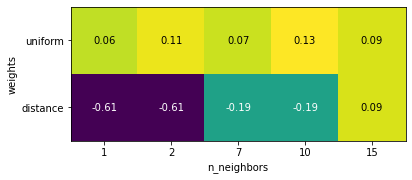

In [202]:
import mglearn
scores = np.array(results.mean_test_score).reshape(2, 5)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='n_neighbors', 
                      xticklabels=param_grid['n_neighbors'], ylabel='weights', 
                      yticklabels=param_grid['weights'], cmap="viridis")

Model statistics:
Mean Absolute Error    4043.1905
Mean Squared Error     51205089.0746
R Square               0.1088
Adjusted R Square      0.0929




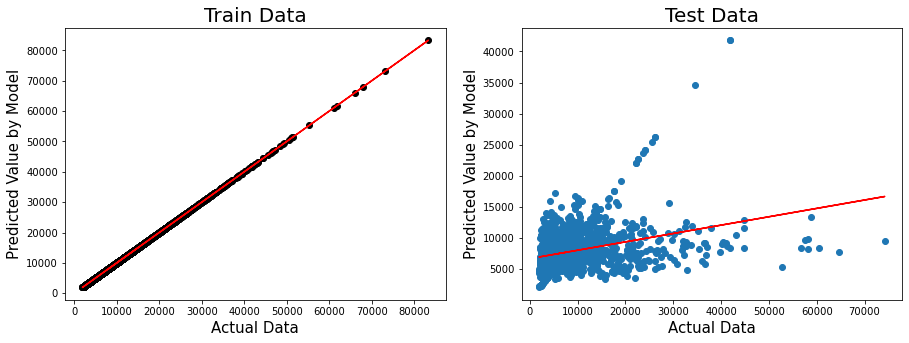

In [204]:
## fitting the model with best output
reg_knn = KNeighborsRegressor(weights = grid_search.best_params_['weights'], 
                              n_neighbors = grid_search.best_params_['n_neighbors'], n_jobs=-1).fit(train_df, y_train)

## output prediction
pred_train = reg_knn.predict(train_df)
pred_test = reg_knn.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

#### Ridge wth PCA

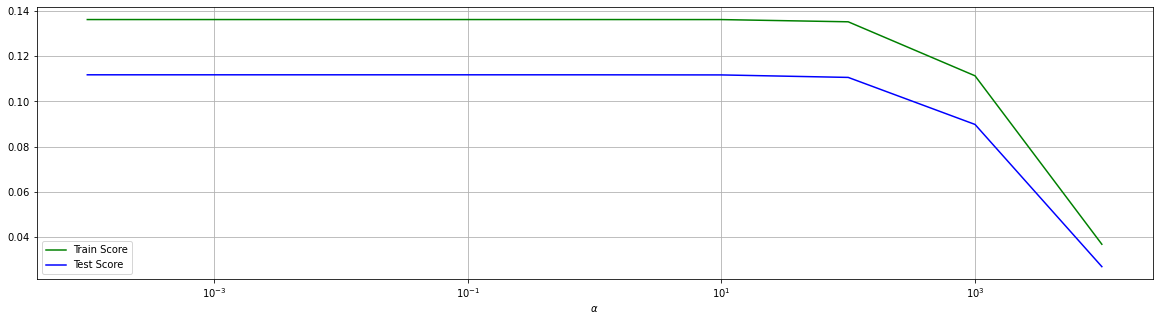

In [205]:
from sklearn.linear_model import Ridge

x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(train_df,y_train)
    train_score_list.append(ridge.score(train_df,y_train))
    test_score_list.append(ridge.score(test_df, y_test))
    
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [206]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.017504      0.003047         1.130914        0.017014   
1       0.023037      0.005097         1.070678        0.042924   
2       0.022447      0.004780         1.196167        0.014515   
3       0.022915      0.001273         1.194619        0.015194   
4       0.022656      0.000456         1.340222        0.016439   

  param_n_neighbors param_weights                                     params  \
0                 1      distance  {'n_neighbors': 1, 'weights': 'distance'}   
1                 1       uniform   {'n_neighbors': 1, 'weights': 'uniform'}   
2                 2      distance  {'n_neighbors': 2, 'weights': 'distance'}   
3                 2       uniform   {'n_neighbors': 2, 'weights': 'uniform'}   
4                 7      distance  {'n_neighbors': 7, 'weights': 'distance'}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0          -0.481942          -0.586110          -0.610098  ...   
1          -0.481942          -0.586110          -0.610098  ...   
2          -0.160169          -0.183763          -0.168567  ...   
3          -0.159000          -0.191627          -0.157968  ...   
4           0.092985           0.050847           0.105815  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0        -0.610226        0.105887                9            1.000000   
1        -0.610226        0.105887                9            1.000000   
2        -0.186760        0.046213                8            1.000000   
3        -0.185023        0.036456                7            0.588424   
4         0.086579        0.019028                4            1.000000   

   split1_train_score  split2_train_score  split3_train_score  \
0            1.000000            1.000000            1.000000   
1            1.000000            1.000000            1.000000   
2            1.000000            1.000000            1.000000   
3            0.594967            0.591436            0.606078   
4            1.000000            1.000000            1.000000   

   split4_train_score  mean_train_score  std_train_score  
0            1.000000          1.000000         0.000000  
1            1.000000          1.000000         0.000000  
2            1.000000          1.000000         0.000000  
3            0.592111          0.594603         0.006103  
4            1.000000          1.000000         0.000000  

[5 rows x 22 columns]

In [207]:
ridge = Ridge()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2', n_jobs =-1)

grid_search.fit(train_df, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

In [208]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.12


Model statistics:
Mean Absolute Error    4267.2729
Mean Squared Error     51040568.6212
R Square               0.1117
Adjusted R Square      0.0959




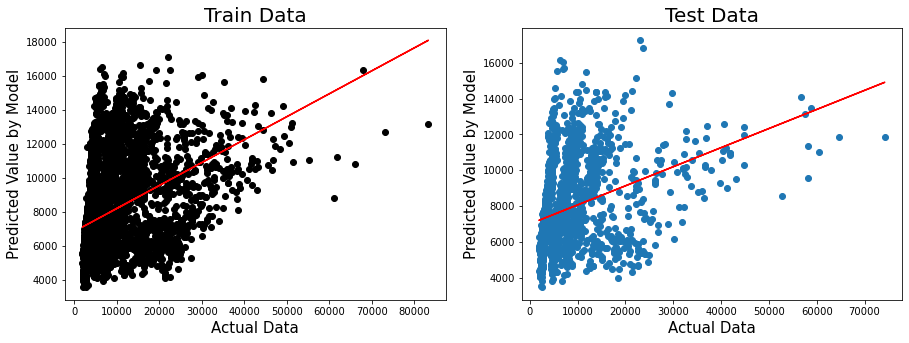

In [209]:
## fitting the model with best output
r_ridge = Ridge(alpha = grid_search.best_params_['alpha']).fit(train_df, y_train)

## output prediction
pred_train = r_ridge.predict(train_df)
pred_test = r_ridge.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(train_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

#### Lasso with PCA

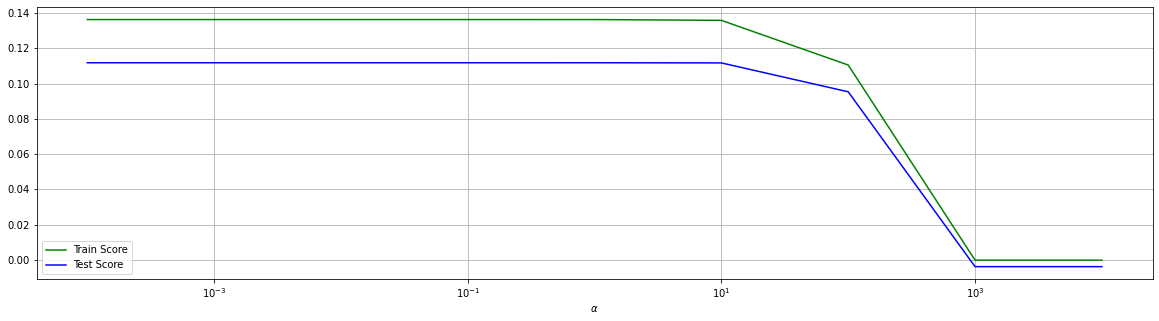

In [210]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
x_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, tol=1)
    lasso.fit(train_df,y_train)
    train_score_list.append(lasso.score(train_df,y_train))
    test_score_list.append(lasso.score(test_df, y_test))

%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [211]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005077      0.000435         0.001953        0.000423      0.0001   
1       0.004971      0.000403         0.002594        0.000121       0.001   
2       0.006609      0.000489         0.002537        0.000490        0.01   
3       0.006430      0.000690         0.003357        0.000836         0.1   
4       0.007298      0.001260         0.003402        0.000663           1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.129976           0.140519           0.109075   
1   {'alpha': 0.001}           0.129976           0.140519           0.109075   
2    {'alpha': 0.01}           0.129976           0.140519           0.109076   
3     {'alpha': 0.1}           0.129977           0.140515           0.109083   
4       {'alpha': 1}           0.129982           0.140475           0.109147   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.132377  ...         0.123922        0.013179                6   
1           0.132377  ...         0.123922        0.013179                5   
2           0.132377  ...         0.123922        0.013179                4   
3           0.132380  ...         0.123923        0.013176                3   
4           0.132405  ...         0.123939        0.013150                2   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.136026            0.133377            0.141179   
1            0.136026            0.133377            0.141179   
2            0.136026            0.133377            0.141179   
3            0.136026            0.133377            0.141179   
4            0.136025            0.133376            0.141179   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.134974            0.141863          0.137484         0.003410  
1            0.134974            0.141863          0.137484         0.003410  
2            0.134974            0.141863          0.137484         0.003410  
3            0.134974            0.141863          0.137484         0.003410  
4            0.134974            0.141863          0.137483         0.003409  

[5 rows x 21 columns]

In [212]:
lasso = Lasso(tol=1)

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]}
grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True,
                           scoring = 'r2', n_jobs =-1)

grid_search.fit(train_df, y_train)

GridSearchCV(cv=5, estimator=Lasso(tol=1), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             return_train_score=True, scoring='r2')

In [213]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.12


Model statistics:
Mean Absolute Error    4261.5671
Mean Squared Error     51042964.6655
R Square               0.1117
Adjusted R Square      0.0958




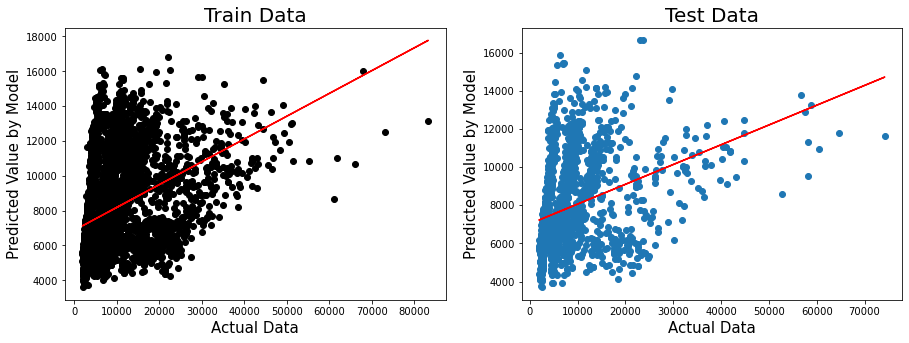

In [214]:
## fitting the model with best output
r_lasso = Lasso(alpha = grid_search.best_params_['alpha']).fit(train_df, y_train)

## output prediction
pred_train = r_lasso.predict(train_df)
pred_test = r_lasso.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

#### LinearSVR with PCA

In [215]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             "loss" : ["epsilon_insensitive", "squared_epsilon_insensitive"]}

lsvr = LinearSVR(tol = 1)
grid_search = GridSearchCV(lsvr, param_grid, cv=5, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)
grid_search.fit(train_df, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=LinearSVR(tol=1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive']},
             return_train_score=True, scoring='r2', verbose=4)

In [216]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'loss': 'squared_epsilon_insensitive'}
Best cross-validation score: 0.12


In [217]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.007481      0.000402         0.001717        0.000043   0.001   
1       0.008672      0.000573         0.002389        0.000469   0.001   
2       0.010623      0.002010         0.002865        0.000841    0.01   
3       0.009687      0.000850         0.002915        0.000240    0.01   
4       0.009904      0.001448         0.003125        0.000248     0.1   

                    param_loss  \
0          epsilon_insensitive   
1  squared_epsilon_insensitive   
2          epsilon_insensitive   
3  squared_epsilon_insensitive   
4          epsilon_insensitive   

                                              params  split0_test_score  \
0        {'C': 0.001, 'loss': 'epsilon_insensitive'}          -1.287857   
1  {'C': 0.001, 'loss': 'squared_epsilon_insensit...           0.122981   
2         {'C': 0.01, 'loss': 'epsilon_insensitive'}          -1.270796   
3  {'C': 0.01, 'loss': 'squared_epsilon_insensiti...           0.101484   
4          {'C': 0.1, 'loss': 'epsilon_insensitive'}          -1.106429   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0          -1.347631          -1.466524  ...        -1.406975        0.075397   
1           0.118996           0.109227  ...         0.116825        0.009580   
2          -1.329812          -1.447278  ...        -1.388328        0.074367   
3           0.116642           0.064940  ...         0.082081        0.029136   
4          -1.158165          -1.261811  ...        -1.208710        0.064521   

   rank_test_score  split0_train_score  split1_train_score  \
0               14           -1.433763           -1.416171   
1                1            0.126583            0.126073   
2               13           -1.414716           -1.397404   
3                2            0.101106            0.103219   
4               12           -1.231235           -1.216641   

   split2_train_score  split3_train_score  split4_train_score  \
0           -1.386342           -1.386850           -1.387928   
1            0.130492            0.125963            0.133806   
2           -1.367905           -1.368565           -1.369451   
3            0.101444            0.097710            0.076461   
4           -1.190328           -1.192388           -1.191494   

   mean_train_score  std_train_score  
0         -1.402211         0.019402  
1          0.128583         0.003101  
2         -1.383608         0.019138  
3          0.095988         0.009925  
4         -1.204417         0.016606  

[5 rows x 22 columns]

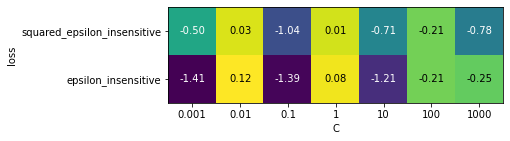

In [218]:
import mglearn
scores = np.array(results.mean_test_score).reshape(2, 7)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='C', 
                      xticklabels=param_grid['C'], ylabel='loss', 
                      yticklabels=param_grid['loss'], cmap="viridis")

Model statistics:
Mean Absolute Error    4437.4454
Mean Squared Error     51088071.8650
R Square               0.1109
Adjusted R Square      0.0950




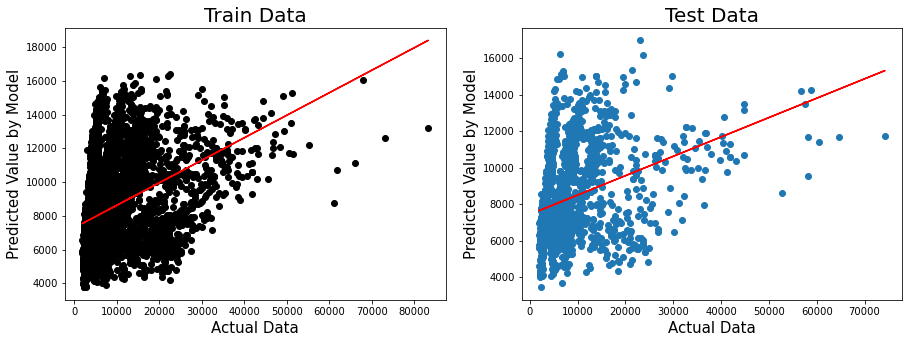

In [219]:
## fitting the model with best output
r_lin = LinearSVR(C = grid_search.best_params_['C'],
                    loss = grid_search.best_params_['loss'], 
                    tol = 1).fit(train_df, y_train)

## output prediction
pred_train = r_lin.predict(train_df)
pred_test = r_lin.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

#### SVR (Kernel = Linear) with PCA

In [220]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'kernel':['linear']}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1)
grid_search.fit(train_df, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   12.3s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.4s finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear']},
             return_train_score=True, verbose=4)

In [221]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'kernel': 'linear'}
Best cross-validation score: 0.04


In [222]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       2.131638      0.015159         0.351092        0.007821   0.001   
1       2.204224      0.057873         0.380292        0.052924    0.01   
2       2.284951      0.027423         0.451292        0.005935     0.1   
3       2.138054      0.095433         0.368505        0.039774       1   
4       2.048002      0.135523         0.334212        0.025368      10   

  param_kernel                            params  split0_test_score  \
0       linear  {'C': 0.001, 'kernel': 'linear'}          -0.091934   
1       linear   {'C': 0.01, 'kernel': 'linear'}          -0.091008   
2       linear    {'C': 0.1, 'kernel': 'linear'}          -0.082399   
3       linear      {'C': 1, 'kernel': 'linear'}          -0.039223   
4       linear     {'C': 10, 'kernel': 'linear'}           0.042844   

   split1_test_score  split2_test_score  ...  mean_test_score  std_test_score  \
0          -0.096812          -0.113439  ...        -0.102946        0.011802   
1          -0.095853          -0.113116  ...        -0.102067        0.011939   
2          -0.086940          -0.104597  ...        -0.093739        0.011996   
3          -0.041182          -0.059445  ...        -0.047725        0.011949   
4           0.054897           0.029380  ...         0.042785        0.018529   

   rank_test_score  split0_train_score  split1_train_score  \
0                6           -0.101338           -0.101519   
1                5           -0.100358           -0.100541   
2                4           -0.091292           -0.091413   
3                3           -0.046714           -0.044948   
4                1            0.044817            0.043543   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.100299           -0.104337           -0.104641   
1           -0.099943           -0.103164           -0.103626   
2           -0.091492           -0.095631           -0.095439   
3           -0.045880           -0.049168           -0.045443   
4            0.045468            0.041637            0.047734   

   mean_train_score  std_train_score  
0         -0.102427         0.001737  
1         -0.101526         0.001545  
2         -0.093053         0.002028  
3         -0.046431         0.001487  
4          0.044640         0.002025  

[5 rows x 22 columns]

Model statistics:
Mean Absolute Error    3872.9155
Mean Squared Error     56602460.7639
R Square               0.0149
Adjusted R Square      -0.0027




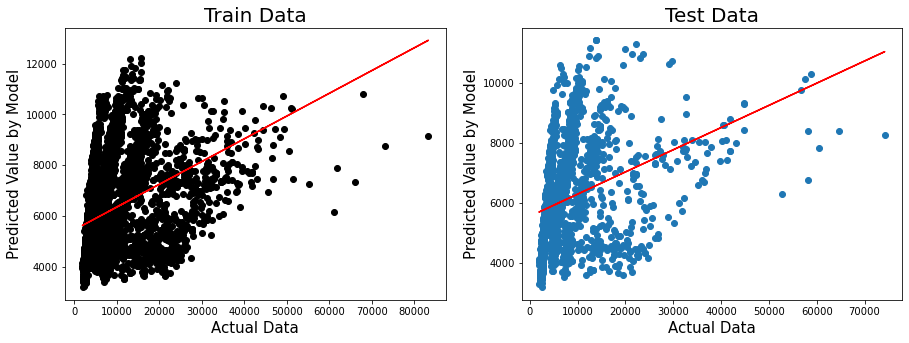

In [223]:
r_svrlin = SVR(C = grid_search.best_params_['C'],
                    kernel = 'linear', 
                    tol = 1).fit(train_df, y_train)

## output prediction
pred_train = r_svrlin.predict(train_df)
pred_test = r_svrlin.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

#### SVR(Kernel = Poly) with PCA

In [224]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 1, 10], 
              'kernel':['poly']}

svr = SVR(cache_size = 14000)
grid_search = GridSearchCV(svr, param_grid, cv=2, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)
grid_search.fit(train_df, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  18 | elapsed:    3.7s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   19.9s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.2min finished


GridSearchCV(cv=2, estimator=SVR(cache_size=14000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10],
                         'kernel': ['poly']},
             return_train_score=True, scoring='r2', verbose=4)

In [225]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'poly'}
Best cross-validation score: 0.05


In [226]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.793630      0.000707         0.528804        0.002093     0.1   
1       0.813732      0.002493         0.525509        0.002043     0.1   
2      20.787016      1.815675         0.402329        0.012898     0.1   
3       0.811666      0.003127         0.526553        0.002208       1   
4       0.749150      0.001082         0.506644        0.000256       1   

  param_gamma param_kernel                                      params  \
0         0.1         poly  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}   
1           1         poly    {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}   
2          10         poly   {'C': 0.1, 'gamma': 10, 'kernel': 'poly'}   
3         0.1         poly    {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}   
4           1         poly      {'C': 1, 'gamma': 1, 'kernel': 'poly'}   

   split0_test_score  split1_test_score  mean_test_score  std_test_score  \
0          -0.096924          -0.107938        -0.102431        0.005507   
1          -0.071799          -0.075731        -0.073765        0.001966   
2          -0.122012          -0.170104        -0.146058        0.024046   
3          -0.096565          -0.107502        -0.102033        0.005468   
4           0.011420           0.012223         0.011822        0.000402   

   rank_test_score  split0_train_score  split1_train_score  mean_train_score  \
0                6           -0.096038           -0.108136         -0.102087   
1                3           -0.065199           -0.069355         -0.067277   
2                7            0.614402            0.613846          0.614124   
3                5           -0.095619           -0.107639         -0.101629   
4                2            0.054018            0.056920          0.055469   

   std_train_score  
0         0.006049  
1         0.002078  
2         0.000278  
3         0.006010  
4         0.001451

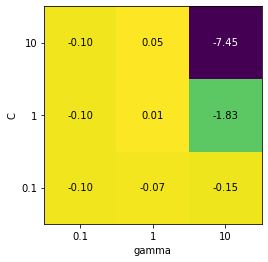

In [227]:
import mglearn
scores = np.array(results.mean_test_score).reshape(3, 3)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', 
                      xticklabels=param_grid['gamma'], ylabel='C', 
                      yticklabels=param_grid['C'], cmap="viridis")

Model statistics:
Mean Absolute Error    3789.2899
Mean Squared Error     54988243.7117
R Square               0.0430
Adjusted R Square      0.0259




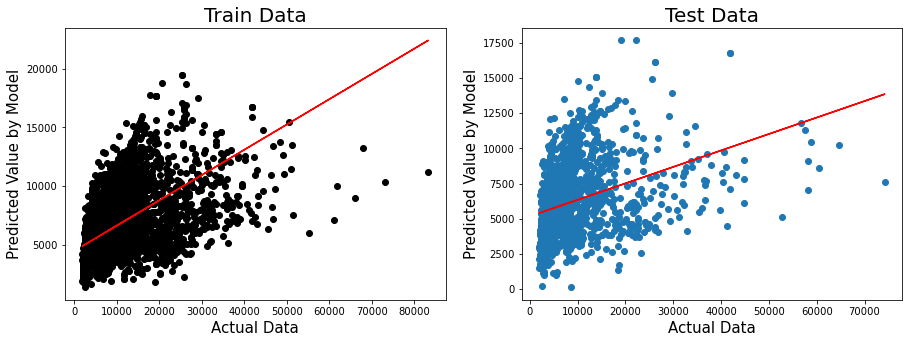

In [228]:
r_svrpoly = SVR(C = grid_search.best_params_['C'],
                    gamma = grid_search.best_params_['gamma'],
                    kernel = 'poly', cache_size = 8000).fit(train_df, y_train)

## output prediction
pred_train = r_svrpoly.predict(train_df)
pred_test = r_svrpoly.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

#### SVR(Kernel = rbf) with PCA

In [229]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001 ,0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.1, 1, 10, 100, 1000], 
              'kernel':['rbf']}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)
grid_search.fit(train_df, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.0min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='r2', verbose=4)

In [230]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.04


In [231]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       2.437302      0.123788         0.498510        0.018043   0.001   
1       2.435455      0.053185         0.511244        0.007200   0.001   
2       2.362966      0.006192         0.516723        0.006172   0.001   
3       2.872079      0.009558         0.510885        0.027050   0.001   
4       2.102126      0.011148         0.421297        0.006327   0.001   

  param_gamma param_kernel                                         params  \
0       0.001          rbf  {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}   
1         0.1          rbf    {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}   
2           1          rbf      {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}   
3          10          rbf     {'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}   
4         100          rbf    {'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}   

   split0_test_score  split1_test_score  ...  mean_test_score  std_test_score  \
0          -0.092031          -0.096886  ...        -0.103036         0.01179   
1          -0.092026          -0.096882  ...        -0.103031         0.01179   
2          -0.092031          -0.096886  ...        -0.103036         0.01179   
3          -0.092031          -0.096886  ...        -0.103036         0.01179   
4          -0.092031          -0.096886  ...        -0.103036         0.01179   

   rank_test_score  split0_train_score  split1_train_score  \
0               32           -0.101441           -0.101594   
1               28           -0.101435           -0.101590   
2               33           -0.101441           -0.101594   
3               34           -0.101441           -0.101594   
4               35           -0.101441           -0.101594   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.100339           -0.104469           -0.104750   
1           -0.100337           -0.104462           -0.104744   
2           -0.100339           -0.104469           -0.104750   
3           -0.100339           -0.104469           -0.104750   
4           -0.100339           -0.104469           -0.104750   

   mean_train_score  std_train_score  
0         -0.102519         0.001764  
1         -0.102514         0.001762  
2         -0.102519         0.001764  
3         -0.102519         0.001764  
4         -0.102519         0.001764  

[5 rows x 23 columns]

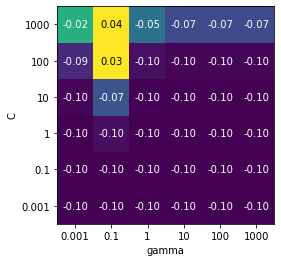

In [232]:
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', 
                      xticklabels=param_grid['gamma'], ylabel='C', 
                      yticklabels=param_grid['C'], cmap="viridis")

Model statistics:
Mean Absolute Error    3660.7252
Mean Squared Error     57276327.4885
R Square               0.0032
Adjusted R Square      -0.0146




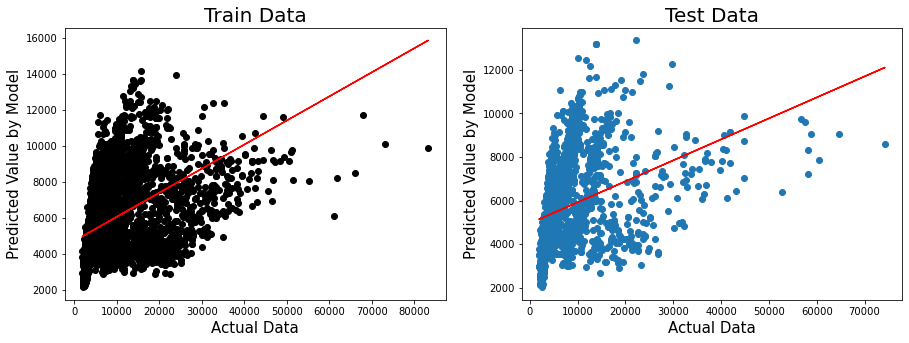

In [233]:
r_svrrbf = SVR(C = grid_search.best_params_['C'],
               gamma = grid_search.best_params_['gamma'],
               kernel = 'rbf', tol = 1).fit(train_df, y_train)

## output prediction
pred_train = r_svrrbf.predict(train_df)
pred_test = r_svrrbf.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

#### Decision Tree Regressor with PCA

In [234]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[50, 100, 200, 300, 500, 1000],
              'min_samples_split':[100, 200, 300, 400, 500], 
              'min_samples_leaf':[1,2,3,4,5],
              'max_leaf_nodes':[1,2,3,4,5, None],
              'max_features' : ["auto", "sqrt", "log2"]}

clf = DecisionTreeRegressor()
grid_search = GridSearchCV(clf, param_grid, cv=5, return_train_score=True, verbose = 4, n_jobs = -1)
grid_search.fit(train_df, y_train)

Fitting 5 folds for each of 2700 candidates, totalling 13500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1256 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 2624 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 3792 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 5483 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 7612 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 9894 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 12368 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 13500 out of 13500 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 200, 300, 500, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [100, 200, 300, 400, 500]},
             return_train_score=True, verbose=4)

In [235]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 50, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 500}
Best cross-validation score: 0.09


In [236]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.003884      0.000459              0.0             0.0   
1       0.004361      0.000358              0.0             0.0   
2       0.005176      0.000953              0.0             0.0   
3       0.005097      0.000755              0.0             0.0   
4       0.004391      0.000318              0.0             0.0   

  param_max_depth param_max_features param_max_leaf_nodes  \
0              50               auto                    1   
1              50               auto                    1   
2              50               auto                    1   
3              50               auto                    1   
4              50               auto                    1   

  param_min_samples_leaf param_min_samples_split  \
0                      1                     100   
1                      1                     200   
2                      1                     300   
3                      1                     400   
4                      1                     500   

                                              params  ...  mean_test_score  \
0  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
1  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
2  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
3  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   
4  {'max_depth': 50, 'max_features': 'auto', 'max...  ...              NaN   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0             NaN             2700                 NaN                 NaN   
1             NaN             2339                 NaN                 NaN   
2             NaN             2278                 NaN                 NaN   
3             NaN             2308                 NaN                 NaN   
4             NaN             2305                 NaN                 NaN   

   split2_train_score  split3_train_score  split4_train_score  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   mean_train_score  std_train_score  
0               NaN              NaN  
1               NaN              NaN  
2               NaN              NaN  
3               NaN              NaN  
4               NaN              NaN  

[5 rows x 25 columns]

Model statistics:
Mean Absolute Error    4304.2339
Mean Squared Error     51717301.5005
R Square               0.0999
Adjusted R Square      0.0839




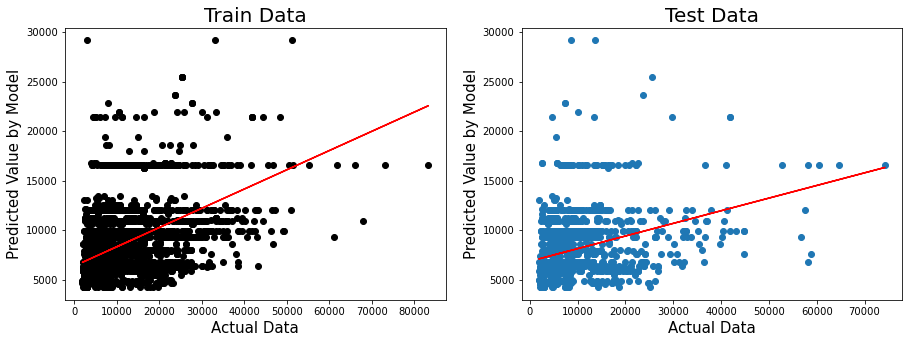

In [237]:
r_dec= DecisionTreeRegressor(max_depth = grid_search.best_params_['max_depth'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'], 
                             max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             max_features = grid_search.best_params_['max_features']).fit(train_df, y_train)

## output prediction
pred_train = r_dec.predict(train_df)
pred_test = r_dec.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

#### Random Forest Regressor with PCA

In [239]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[50, 100, 300, 500, 1000],
              'min_samples_split':[100, 300, 400, 500], 
              'min_samples_leaf':[1,2,4,5],
              'max_leaf_nodes':[1,2,4,5],
              'max_features' : ["auto", "sqrt", "log2"]
              }

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=3, return_train_score=True, scoring = 'r2', n_jobs=-1, verbose = 4)
grid_search.fit(train_df, y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 221 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1305 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2137 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2690 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  7.9min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 300, 500, 1000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [1, 2, 4, 5],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [100, 300, 400, 500]},
             return_train_score=True, scoring='r2', verbose=4)

In [240]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 500, 'max_features': 'auto', 'max_leaf_nodes': 5, 'min_samples_leaf': 5, 'min_samples_split': 300}
Best cross-validation score: 0.10


In [241]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.068935      0.000413              0.0             0.0   
1       0.071367      0.003904              0.0             0.0   
2       0.070856      0.000250              0.0             0.0   
3       0.065180      0.001589              0.0             0.0   
4       0.062908      0.000728              0.0             0.0   

  param_max_depth param_max_features param_max_leaf_nodes  \
0              50               auto                    1   
1              50               auto                    1   
2              50               auto                    1   
3              50               auto                    1   
4              50               auto                    1   

  param_min_samples_leaf param_min_samples_split  \
0                      1                     100   
1                      1                     300   
2                      1                     400   
3                      1                     500   
4                      2                     100   

                                              params  ...  split1_test_score  \
0  {'max_depth': 50, 'max_features': 'auto', 'max...  ...                NaN   
1  {'max_depth': 50, 'max_features': 'auto', 'max...  ...                NaN   
2  {'max_depth': 50, 'max_features': 'auto', 'max...  ...                NaN   
3  {'max_depth': 50, 'max_features': 'auto', 'max...  ...                NaN   
4  {'max_depth': 50, 'max_features': 'auto', 'max...  ...                NaN   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0                NaN              NaN             NaN              960   
1                NaN              NaN             NaN              745   
2                NaN              NaN             NaN              746   
3                NaN              NaN             NaN              762   
4                NaN              NaN             NaN              763   

   split0_train_score  split1_train_score  split2_train_score  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   mean_train_score  std_train_score  
0               NaN              NaN  
1               NaN              NaN  
2               NaN              NaN  
3               NaN              NaN  
4               NaN              NaN  

[5 rows x 21 columns]

Model statistics:
Mean Absolute Error    4372.1800
Mean Squared Error     51998137.5160
R Square               0.0950
Adjusted R Square      0.0789




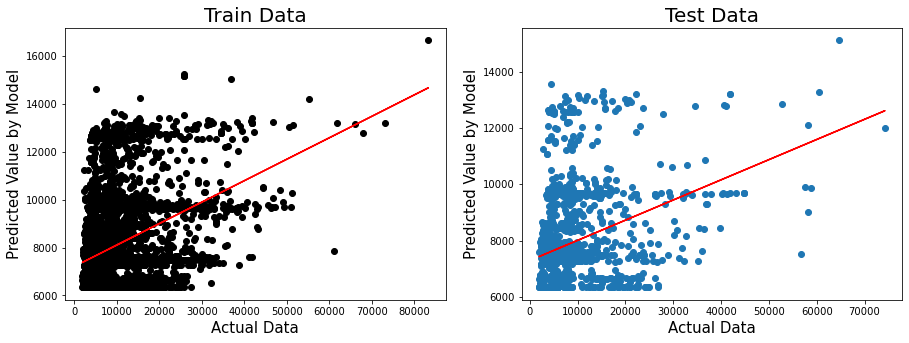

In [242]:
r_rand= RandomForestRegressor(max_depth = grid_search.best_params_['max_depth'], 
                             min_samples_split = grid_search.best_params_['min_samples_split'], 
                             max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             max_features = grid_search.best_params_['max_features']).fit(train_df, y_train)

## output prediction
pred_train = r_rand.predict(train_df)
pred_test = r_rand.predict(test_df)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2, adjusted_r2 = r2_score(test_df, y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))
print("Adjusted R Square      {:.4f}".format(adjusted_r2))
print('\n') 

predictive_performance(y_train, pred_train, y_test, pred_test, (15,5))

### Models Comparison Table (Before and After PCA)

In [251]:
models_df = pd.DataFrame(columns= ['Models','Mean Absolute Error', 'Mean Squared Error',
                                'R Square', 'Adjusted R Square','AFTER PCA', 
                                'Mean Absolute Error(PCA)', 'Mean Squared Error(PCA)',
                                'R Square(PCA)', 'Adjusted R Square(PCA)'])

models_df['Models'] = ['Linear Regression', 'KNN', 'Ridge', 'Lasso', 'LinearSVR', 'SVR(Linear)',
                      'SVR(Poly)', 'SVR(rbf)', 'Decision Tree', 'Random Forest']
models_df['Mean Absolute Error'] = [4146.0026,3973.2071,4151.2273,4140.6349,4349.8851,3853.1958,
                                   3484.3684,3614.8669,1964.4023,1807.0304]
models_df['Mean Squared Error'] = [48838016.1771,50433945.4117,48934930.8970,48745586.0153,50208278.1966,
                                  56678308.9744,51226138.4232,56519758.2581,19618142.7632,18199175.3328]
models_df['R Square'] = [0.1500,0.1223,0.1483,0.1516,0.1262,0.0136,0.1085,0.0163,0.6586,0.6833]
models_df['Adjusted R Square'] = [0.1226,0.0940,0.1209,0.1243,0.0980,-0.0182,0.0797,-0.0154,0.6476,0.6731]
models_df['AFTER PCA'] = ['-','-','-','-','-','-','-','-','-','-']
models_df['Mean Absolute Error(PCA)'] = [4267.3474,4043.1905,4267.2729,4261.5671,4437.4454,3872.9155,
                                       3789.2899,3660.7252, 4304.2339,4372.1800]
models_df['Mean Squared Error(PCA)'] = [51037557.0059,51205089.0746,51040568.6212,51042964.6655,
                                       51088071.8650, 56602460.7639,54988243.7117, 57276327.4885,
                                       51717301.5005,51998137.5160]
models_df['R Square(PCA)'] = [0.1117,0.1088,0.1117,0.1117,0.1109,0.0149,0.0430,0.0032,0.0999,0.0950]
models_df['Adjusted R Square(PCA)'] = [0.0959,0.0929,0.0959,0.0958,0.0950,0.0027,0.0259, -0.0146,
                                      0.0839,0.0789]

print("----------------------- MODEL COMPARISION TABLE (BEFORE AND AFTER PCA) -----------------------")
models_df


----------------------- MODEL COMPARISION TABLE (BEFORE AND AFTER PCA) -----------------------


Models  Mean Absolute Error  Mean Squared Error  R Square  \
0  Linear Regression            4146.0026        4.883802e+07    0.1500   
1                KNN            3973.2071        5.043395e+07    0.1223   
2              Ridge            4151.2273        4.893493e+07    0.1483   
3              Lasso            4140.6349        4.874559e+07    0.1516   
4          LinearSVR            4349.8851        5.020828e+07    0.1262   
5        SVR(Linear)            3853.1958        5.667831e+07    0.0136   
6          SVR(Poly)            3484.3684        5.122614e+07    0.1085   
7           SVR(rbf)            3614.8669        5.651976e+07    0.0163   
8      Decision Tree            1964.4023        1.961814e+07    0.6586   
9      Random Forest            1807.0304        1.819918e+07    0.6833   

   Adjusted R Square AFTER PCA  Mean Absolute Error(PCA)  \
0             0.1226         -                 4267.3474   
1             0.0940         -                 4043.1905   
2             0.1209         -                 4267.2729   
3             0.1243         -                 4261.5671   
4             0.0980         -                 4437.4454   
5            -0.0182         -                 3872.9155   
6             0.0797         -                 3789.2899   
7            -0.0154         -                 3660.7252   
8             0.6476         -                 4304.2339   
9             0.6731         -                 4372.1800   

   Mean Squared Error(PCA)  R Square(PCA)  Adjusted R Square(PCA)  
0             5.103756e+07         0.1117                  0.0959  
1             5.120509e+07         0.1088                  0.0929  
2             5.104057e+07         0.1117                  0.0959  
3             5.104296e+07         0.1117                  0.0958  
4             5.108807e+07         0.1109                  0.0950  
5             5.660246e+07         0.0149                  0.0027  
6             5.498824e+07         0.0430                  0.0259  
7             5.727633e+07         0.0032                 -0.0146  
8             5.171730e+07         0.0999                  0.0839  
9             5.199814e+07         0.0950                  0.0789

From the above comparison we can cleary see that after doing PCA on all the models we were not able to improve the performance of the models.

### Deep Learning

In [286]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras.backend import clear_session
from tensorflow.keras import layers, Input, optimizers, Model
from tensorflow.keras.layers import  Dense, Dropout
from keras.models import Sequential

In [253]:
from keras import backend as K

def RSquare(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [327]:
#Write you code here
clear_session()

inp = Input(shape=(x_train.shape[1],), dtype='int32', name='Input_Layer')
dense_layer1 = Dense(512, kernel_initializer='normal', activation='relu')(inp)
drop1 = Dropout(0.2)(dense_layer1)
dense_layer2 = Dense(256, kernel_initializer='normal', activation='relu')(drop1)
drop2 = Dropout(0.2)(dense_layer2)
dense_layer3 = Dense(128, kernel_initializer='normal', activation='relu')(drop2)
out = Dense(1, kernel_initializer='normal')(drop2)

## creating model
model = Model(inp, out)
## compile
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse',RSquare])

## fitting model
hist = model.fit(x_train, y_train, epochs=30, verbose=1, validation_data=(x_test, y_test), batch_size=150)

Epoch 1/30
49/49 [==============================] - 1s 6ms/step - loss: 106324616.0000 - mae: 7857.5103 - mse: 106324616.0000 - RSquare: -1.4994 - val_loss: 123438416.0000 - val_mae: 8121.9780 - val_mse: 123438416.0000 - val_RSquare: -1.2527
Epoch 2/30
49/49 [==============================] - 0s 3ms/step - loss: 90593528.0000 - mae: 6735.6968 - mse: 90593528.0000 - RSquare: -1.1002 - val_loss: 88019672.0000 - val_mae: 5609.9912 - val_mse: 88019672.0000 - val_RSquare: -0.5648
Epoch 3/30
49/49 [==============================] - 0s 3ms/step - loss: 52916740.0000 - mae: 4321.1167 - mse: 52916740.0000 - RSquare: -0.1955 - val_loss: 57861548.0000 - val_mae: 4698.0547 - val_mse: 57861548.0000 - val_RSquare: -0.0158
Epoch 4/30
49/49 [==============================] - 0s 3ms/step - loss: 44522264.0000 - mae: 4340.1558 - mse: 44522264.0000 - RSquare: -0.0076 - val_loss: 57040808.0000 - val_mae: 4623.1035 - val_mse: 57040808.0000 - val_RSquare: -5.0888e-04
Epoch 5/30
49/49 [======================

In [328]:
def loss_plot(train_loss, test_loss, total_epoch, given):
    """
    This function plots the loss graph of both train and validation dataset.
    """
    fig = plt.figure(figsize=(15,5))  #setting up figure size
    plt.plot(train_loss);  plt.plot(test_loss)
    #setting up ticks
    plt.xticks(range(0,total_epoch))
    plt.legend(["Train_Loss", "Validation_Loss"])
    #setting up labels
    plt.xlabel("Number of Epochs", fontsize=15)
    plt.ylabel("Loss", fontsize=15)
    plt.title(given, fontsize=20)
    return plt.show()



def accuracy_plot(train_accuracy, test_accuracy, total_epoch, given):
    """
    This function plots the accuracy graph of both train and validation dataset.
    """
    fig = plt.figure(figsize=(15,5))  #setting up figure size
    plt.plot(train_accuracy);  plt.plot(test_accuracy)
    #setting up ticks
    plt.xticks(range(0,total_epoch))
    plt.legend(["Train_Accuracy", "Validation_Accuracy"])
    #setting up labels
    plt.xlabel("Number of Epochs", fontsize=15)
    plt.ylabel("RSquare(coefficient of determination)", fontsize=15)
    plt.title(given, fontsize=20)
    return plt.show()

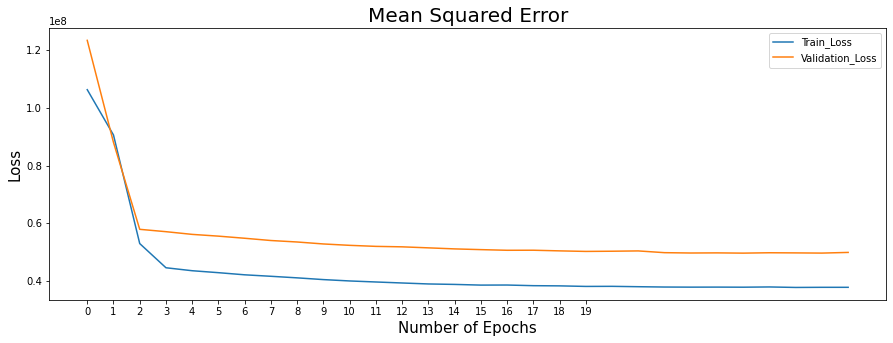

In [329]:
loss_plot(hist.history["loss"], hist.history["val_loss"], 20, "Mean Squared Error")

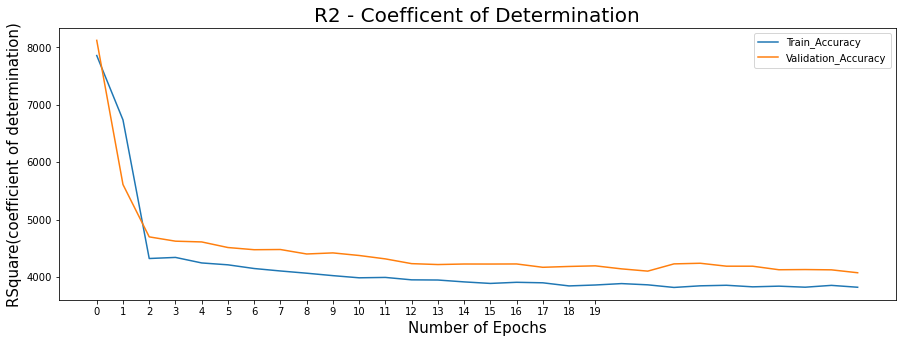

In [330]:
accuracy_plot(hist.history["mae"], hist.history["val_mae"], 20, "R2 - Coefficent of Determination")

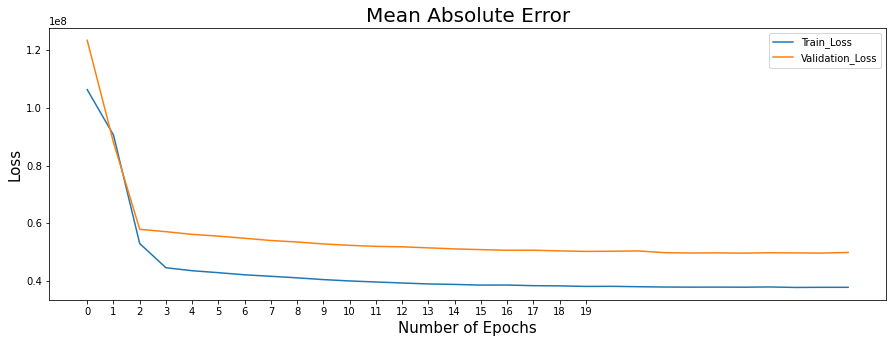

In [331]:
loss_plot(hist.history["loss"], hist.history["val_loss"], 20, "Mean Absolute Error")

In [332]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 57)]              0         
_________________________________________________________________
dense (Dense)                (None, 512)               29696     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 161,281
Trainable params: 161,281
Non-trainable params: 0
_______________________________________________________

In [333]:
from sklearn.metrics import r2_score
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test), batch_size=32)
## output prediction
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)

print("Model statistics:")
print("Mean Absolute Error    {:.4f}".format(mae))
print("Mean Squared Error     {:.4f}".format(mse))
print("R Square               {:.4f}".format(r2))

229/229 [==============================] - 1s 2ms/step - loss: 37771000.0000 - mae: 3825.5022 - mse: 37771000.0000 - RSquare: 0.0821 - val_loss: 49126472.0000 - val_mae: 4202.2256 - val_mse: 49126472.0000 - val_RSquare: 0.0619
Model statistics:
Mean Absolute Error    4202.2253
Mean Squared Error     49126467.5062
R Square               0.1450


### All Models Comparison Table

In [339]:
models_df = pd.DataFrame(columns= ['Models','Mean Absolute Error', 'Mean Squared Error',
                                'R Square', 'Adjusted R Square'])

models_df['Models'] = ['Linear Regression', 'KNN', 'Ridge', 'Lasso', 'LinearSVR', 'SVR(Linear)',
                      'SVR(Poly)', 'SVR(rbf)', 'Decision Tree', 'Random Forest', 'Linear Regression(PCA)', 
                      'KNN(PCA)', 'Ridge(PCA)', 'Lasso(PCA)', 'LinearSVR(PCA)', 'SVR(Linear)(PCA)',
                      'SVR(Poly)(PCA)', 'SVR(rbf)(PCA)', 'Decision Tree(PCA)', 'Random Forest(PCA)',
                      'Bagging with Decision Tree', 'Bagging with Random Forest', 'Pasting with Decision Tree',
                      'Pasting with Random Forest','AdaBoost on Decision Tree', 'AdaBoost on Random Forest',
                      'Gradient Boosting','Deep Learning']
models_df['Mean Absolute Error'] = [4146.0026,3973.2071,4151.2273,4140.6349,4349.8851,3853.1958,
                                   3484.3684,3614.8669,1964.4023,1807.0304,4267.3474,4043.1905,4267.2729,
                                    4261.5671,4437.4454,3872.9155,3789.2899,3660.7252, 4304.2339,4372.1800,
                                   2042.4688,1840.3129,1964.4023,1805.7133,1968.2965,1836.0643,1902.3821,4202.2253]
models_df['Mean Squared Error'] = [48838016.1771,50433945.4117,48934930.8970,48745586.0153,50208278.1966,
                                  56678308.9744,51226138.4232,56519758.2581,19618142.7632,18199175.3328,
                                   51037557.0059,51205089.0746,51040568.6212,51042964.6655,
                                       51088071.8650, 56602460.7639,54988243.7117, 57276327.4885,
                                       51717301.5005,51998137.5160,22443328.0234,18468855.3796,19618142.7632,
                                  18152284.2999,18367999.9212,17497937.4204,19739694.2072,49126467.5062]
models_df['R Square'] = [0.1500,0.1223,0.1483,0.1516,0.1262,0.0136,0.1085,0.0163,0.6586,0.6833,0.1117,
                         0.1088,0.1117,0.1117,0.1109,0.0149,0.0430,0.0032,0.0999,0.0950,0.6094,0.6786,0.6586,
                        0.6841,0.6803,0.6955,0.6565,0.1450]
models_df['Adjusted R Square'] = [0.1226,0.0940,0.1209,0.1243,0.0980,-0.0182,0.0797,-0.0154,0.6476,0.6731,
                                  0.0959,0.0929,0.0959,0.0958,0.0950,0.0027,0.0259, -0.0146,
                                      0.0839,0.0789,0.5968,0.6682,0.6476,0.6739,0.6700,0.6857,0.6454,0.1445]

print("--------------------------- ALL MODELS COMPARISION TABLE ---------------------------")
models_df

--------------------------- ALL MODELS COMPARISION TABLE ---------------------------


Models  Mean Absolute Error  Mean Squared Error  \
0            Linear Regression            4146.0026        4.883802e+07   
1                          KNN            3973.2071        5.043395e+07   
2                        Ridge            4151.2273        4.893493e+07   
3                        Lasso            4140.6349        4.874559e+07   
4                    LinearSVR            4349.8851        5.020828e+07   
5                  SVR(Linear)            3853.1958        5.667831e+07   
6                    SVR(Poly)            3484.3684        5.122614e+07   
7                     SVR(rbf)            3614.8669        5.651976e+07   
8                Decision Tree            1964.4023        1.961814e+07   
9                Random Forest            1807.0304        1.819918e+07   
10      Linear Regression(PCA)            4267.3474        5.103756e+07   
11                    KNN(PCA)            4043.1905        5.120509e+07   
12                  Ridge(PCA)            4267.2729        5.104057e+07   
13                  Lasso(PCA)            4261.5671        5.104296e+07   
14              LinearSVR(PCA)            4437.4454        5.108807e+07   
15            SVR(Linear)(PCA)            3872.9155        5.660246e+07   
16              SVR(Poly)(PCA)            3789.2899        5.498824e+07   
17               SVR(rbf)(PCA)            3660.7252        5.727633e+07   
18          Decision Tree(PCA)            4304.2339        5.171730e+07   
19          Random Forest(PCA)            4372.1800        5.199814e+07   
20  Bagging with Decision Tree            2042.4688        2.244333e+07   
21  Bagging with Random Forest            1840.3129        1.846886e+07   
22  Pasting with Decision Tree            1964.4023        1.961814e+07   
23  Pasting with Random Forest            1805.7133        1.815228e+07   
24   AdaBoost on Decision Tree            1968.2965        1.836800e+07   
25   AdaBoost on Random Forest            1836.0643        1.749794e+07   
26           Gradient Boosting            1902.3821        1.973969e+07   
27               Deep Learning            4202.2253        4.912647e+07   

    R Square  Adjusted R Square  
0     0.1500             0.1226  
1     0.1223             0.0940  
2     0.1483             0.1209  
3     0.1516             0.1243  
4     0.1262             0.0980  
5     0.0136            -0.0182  
6     0.1085             0.0797  
7     0.0163            -0.0154  
8     0.6586             0.6476  
9     0.6833             0.6731  
10    0.1117             0.0959  
11    0.1088             0.0929  
12    0.1117             0.0959  
13    0.1117             0.0958  
14    0.1109             0.0950  
15    0.0149             0.0027  
16    0.0430             0.0259  
17    0.0032            -0.0146  
18    0.0999             0.0839  
19    0.0950             0.0789  
20    0.6094             0.5968  
21    0.6786             0.6682  
22    0.6586             0.6476  
23    0.6841             0.6739  
24    0.6803             0.6700  
25    0.6955             0.6857  
26    0.6565             0.6454  
27    0.1450             0.1445

There a

### FINAL MODEL

In [ ]:
###